In [1]:
import math
from multiprocessing import Pool
import os
import sys
import itertools
import time
import tempfile
import pickle

sys.path.append(os.path.abspath(os.pardir))

%matplotlib inline

import keras
import numpy as np
import pandas as pd
import seaborn as sns

# Metrics
from sklearn.metrics import f1_score

# Notebook helper methods
from tdparse import notebook_helper
# Models
from tdparse.models.tdlstm import LSTM, TDLSTM, TCLSTM
# Tokenisers
from tdparse.tokenisers import whitespace, ark_twokenize, stanford
# Word Vectors
from tdparse.word_vectors import PreTrained, GloveTwitterVectors, GloveCommonCrawl
# Get the data
from tdparse.helper import read_config, full_path
from tdparse.parsers import dong, semeval_14

Using TensorFlow backend.


In [2]:
# Load the datasets
dong_train = dong(full_path(read_config('dong_twit_train_data')))
dong_test = dong(full_path(read_config('dong_twit_test_data')))
# Load the word vectors
sswe_path = full_path(read_config('sswe_files')['vo_zhang'])
sswe = PreTrained(sswe_path, name='sswe')
#glove_50 = GloveTwitterVectors(50)
#glove_100 = GloveTwitterVectors(100)
#glove_200 = GloveTwitterVectors(200)
#word_vectors = [sswe, glove_50, glove_100, glove_200]

In [3]:
def half_average_dataset(dataset):
    '''
    :param dataset: A training dataset
    :type dataset: TargetCollection
    :returns: Half the average sentence length of the given dataset
    :rtype: int
    '''
    sentence_lengths = [len(data['text'].split()) for data in dataset.data()]
    return math.ceil(sum(sentence_lengths) / len(sentence_lengths) / 2)

# Testing LSTM for the affect of validation set variation

In [ ]:
result_folder = os.path.abspath(os.path.join(os.getcwd(), os.pardir, 'results', 'TDLstm'))
lstm_result_folder = os.path.join(result_folder, 'lstm')
os.makedirs(lstm_result_folder, exist_ok=True)
repeated_params = {'reproducible' : False, 'validation_size' : 0.3, 
                   'patience' : 10, 'epochs' : 300, 'verbose' : 1, 
                   'org_initialisers' : True}
score_kwargs = {'average' : 'macro'}
for word_vector in word_vectors:
    lstm_repeated_results = os.path.join(lstm_result_folder, 'LSTM {} Repeated Results.json'.format(word_vector))
    lstm = LSTM(ark_twokenize, word_vector, lower=True, pad_size=-1)
    lstm_rep_results = lstm.repeated_results(dong_train, dong_test, 60, f1_score,
                                             'Dong Twitter', results_file=lstm_repeated_results,
                                             re_write=False, score_kwargs=score_kwargs, **repeated_params)

Train on 4373 samples, validate on 1875 samples
Epoch 1/300
4373/4373 [==============================] - 6s 1ms/step - loss: 1.0772 - acc: 0.4992 - val_loss: 1.0614 - val_acc: 0.5003
Epoch 2/300
4373/4373 [==============================] - 5s 1ms/step - loss: 1.0533 - acc: 0.5006 - val_loss: 1.0473 - val_acc: 0.5003
Epoch 3/300
4373/4373 [==============================] - 5s 1ms/step - loss: 1.0443 - acc: 0.5006 - val_loss: 1.0421 - val_acc: 0.5003
Epoch 4/300
4373/4373 [==============================] - 5s 1ms/step - loss: 1.0410 - acc: 0.5006 - val_loss: 1.0403 - val_acc: 0.5003
Epoch 5/300
4373/4373 [==============================] - 5s 1ms/step - loss: 1.0399 - acc: 0.5006 - val_loss: 1.0397 - val_acc: 0.5003
Epoch 6/300
4373/4373 [==============================] - 4s 991us/step - loss: 1.0394 - acc: 0.5006 - val_loss: 1.0394 - val_acc: 0.5003
Epoch 7/300
4373/4373 [==============================] - 4s 1ms/step - loss: 1.0392 - acc: 0.5006 - val_loss: 1.0392 - val_acc: 0.5003
Epoch

Epoch 61/300
4373/4373 [==============================] - 4s 1ms/step - loss: 0.8738 - acc: 0.6005 - val_loss: 0.8889 - val_acc: 0.5888
Epoch 62/300
4373/4373 [==============================] - 4s 1ms/step - loss: 0.8725 - acc: 0.5888 - val_loss: 0.9010 - val_acc: 0.5792
Epoch 63/300
4373/4373 [==============================] - 4s 998us/step - loss: 0.8703 - acc: 0.6014 - val_loss: 0.9236 - val_acc: 0.5536
Epoch 64/300
4373/4373 [==============================] - 4s 1ms/step - loss: 0.8681 - acc: 0.5943 - val_loss: 0.9169 - val_acc: 0.5520
Epoch 65/300
4373/4373 [==============================] - 5s 1ms/step - loss: 0.8666 - acc: 0.5959 - val_loss: 0.8824 - val_acc: 0.5813
Epoch 66/300
4373/4373 [==============================] - 4s 1ms/step - loss: 0.8663 - acc: 0.6000 - val_loss: 0.8704 - val_acc: 0.5941
Epoch 67/300
4373/4373 [==============================] - 5s 1ms/step - loss: 0.8617 - acc: 0.5978 - val_loss: 0.9005 - val_acc: 0.5744
Epoch 68/300
4373/4373 [======================

0.603265716495
Train on 4373 samples, validate on 1875 samples
Epoch 1/300
4373/4373 [==============================] - 5s 1ms/step - loss: 1.0773 - acc: 0.4981 - val_loss: 1.0612 - val_acc: 0.5003
Epoch 2/300
4373/4373 [==============================] - 4s 1ms/step - loss: 1.0531 - acc: 0.5006 - val_loss: 1.0472 - val_acc: 0.5003
Epoch 3/300
4373/4373 [==============================] - 5s 1ms/step - loss: 1.0442 - acc: 0.5006 - val_loss: 1.0421 - val_acc: 0.5003
Epoch 4/300
4373/4373 [==============================] - 4s 1ms/step - loss: 1.0410 - acc: 0.5006 - val_loss: 1.0403 - val_acc: 0.5003
Epoch 5/300
4373/4373 [==============================] - 4s 1ms/step - loss: 1.0399 - acc: 0.5006 - val_loss: 1.0397 - val_acc: 0.5003
Epoch 6/300
4373/4373 [==============================] - 4s 970us/step - loss: 1.0395 - acc: 0.5006 - val_loss: 1.0395 - val_acc: 0.5003
Epoch 7/300
4373/4373 [==============================] - 5s 1ms/step - loss: 1.0393 - acc: 0.5006 - val_loss: 1.0393 - val_ac

In [ ]:
result_folder = os.path.abspath(os.path.join(os.getcwd(), os.pardir, 'results', 'TDLstm'))
tdlstm_result_folder = os.path.join(result_folder, 'tdlstm')
os.makedirs(tdlstm_result_folder, exist_ok=True)
repeated_params = {'reproducible' : False, 'validation_size' : 0.3, 
                   'patience' : 10, 'epochs' : 300, 'verbose' : 1, 
                   'org_initialisers' : True}
score_kwargs = {'average' : 'macro'}
pad_sizes = [5, 10, half_average_dataset(dong_train), 15, -1]
for pad_size in pad_sizes:
    print(pad_size)
    tdlstm_repeated_results = os.path.join(tdlstm_result_folder, 'TDLSTM {} Pad Size {} Repeated Results.json'\
                                                                 .format(sswe, pad_size))
    tdlstm = TDLSTM(ark_twokenize, sswe, lower=True, pad_size=pad_size)
    tdlstm_rep_results = tdlstm.repeated_results(dong_train, dong_test, 60, f1_score,
                                                 'Dong Twitter', results_file=tdlstm_repeated_results,
                                                 re_write=False, score_kwargs=score_kwargs, **repeated_params)
    print(tdlstm_rep_results)

5
[0.5974044716136527, 0.5758951460280506, 0.5834808923713788, 0.5880956380870128, 0.5748413173906847, 0.5824670113529876, 0.6030205056933168, 0.5756893361959213, 0.5866119368151163, 0.5907036057588758, 0.5825191634004082, 0.5690845221004573, 0.5818107498587409, 0.5888063242762731, 0.5714344734839623, 0.5924360437332433, 0.5968500211307116, 0.5694929379966395, 0.5861284433666658, 0.5853628814003565, 0.5962713200048756, 0.5760815316256681, 0.5748266983561101, 0.6080294661122525, 0.570554396562961, 0.5810423447941923, 0.5873197264185556, 0.5910243946048029, 0.6011359602413915, 0.5854452448063472, 0.600364421071725, 0.5748506489960393, 0.585056934516326, 0.5740118526747588, 0.5789586492771207, 0.6011301764705156, 0.5941195603027576, 0.5949358469506157, 0.5535759141559932, 0.5912041086549715, 0.5821617167461671, 0.59820126617065, 0.5720002324519653, 0.6123774451782977, 0.5806423774228348, 0.5683724135255336, 0.5808532923059956, 0.587075542181959, 0.5699581722500495, 0.5653119027914876, 0.5

Epoch 43/300
4373/4373 [==============================] - 2s 409us/step - loss: 0.7948 - acc: 0.6513 - val_loss: 0.8432 - val_acc: 0.6240
Epoch 44/300
4373/4373 [==============================] - 2s 382us/step - loss: 0.7937 - acc: 0.6501 - val_loss: 0.8399 - val_acc: 0.6245
Epoch 45/300
4373/4373 [==============================] - 2s 412us/step - loss: 0.7888 - acc: 0.6542 - val_loss: 0.8295 - val_acc: 0.6357
Epoch 46/300
4373/4373 [==============================] - 2s 432us/step - loss: 0.7882 - acc: 0.6574 - val_loss: 0.8293 - val_acc: 0.6411
Epoch 47/300
4373/4373 [==============================] - 2s 443us/step - loss: 0.7820 - acc: 0.6549 - val_loss: 0.8329 - val_acc: 0.6320
Epoch 48/300
4373/4373 [==============================] - 2s 443us/step - loss: 0.7819 - acc: 0.6613 - val_loss: 0.8395 - val_acc: 0.6256
Epoch 49/300
4373/4373 [==============================] - 2s 450us/step - loss: 0.7785 - acc: 0.6604 - val_loss: 0.8215 - val_acc: 0.6411
Epoch 50/300
4373/4373 [==========

Epoch 21/300
4373/4373 [==============================] - 2s 391us/step - loss: 0.8866 - acc: 0.5898 - val_loss: 0.9180 - val_acc: 0.5653
Epoch 22/300
4373/4373 [==============================] - 2s 430us/step - loss: 0.8789 - acc: 0.5973 - val_loss: 0.9124 - val_acc: 0.5568
Epoch 23/300
4373/4373 [==============================] - 2s 445us/step - loss: 0.8729 - acc: 0.5989 - val_loss: 0.9100 - val_acc: 0.5712
Epoch 24/300
4373/4373 [==============================] - 2s 410us/step - loss: 0.8665 - acc: 0.6032 - val_loss: 0.9024 - val_acc: 0.5680
Epoch 25/300
4373/4373 [==============================] - 2s 417us/step - loss: 0.8601 - acc: 0.6101 - val_loss: 0.8981 - val_acc: 0.5733
Epoch 26/300
4373/4373 [==============================] - 2s 361us/step - loss: 0.8540 - acc: 0.6103 - val_loss: 0.8897 - val_acc: 0.5749
Epoch 27/300
4373/4373 [==============================] - 2s 411us/step - loss: 0.8493 - acc: 0.6131 - val_loss: 0.8871 - val_acc: 0.5728
Epoch 28/300
4373/4373 [==========

4373/4373 [==============================] - 2s 424us/step - loss: 0.7673 - acc: 0.6629 - val_loss: 0.8437 - val_acc: 0.6219
Epoch 49/300
4373/4373 [==============================] - 2s 403us/step - loss: 0.7681 - acc: 0.6606 - val_loss: 0.8483 - val_acc: 0.6085
Epoch 50/300
4373/4373 [==============================] - 2s 370us/step - loss: 0.7630 - acc: 0.6670 - val_loss: 0.8533 - val_acc: 0.6192
Epoch 51/300
4373/4373 [==============================] - 2s 379us/step - loss: 0.7595 - acc: 0.6698 - val_loss: 0.8666 - val_acc: 0.5968
Epoch 52/300
4373/4373 [==============================] - 2s 440us/step - loss: 0.7588 - acc: 0.6661 - val_loss: 0.8411 - val_acc: 0.6181
Epoch 53/300
4373/4373 [==============================] - 2s 410us/step - loss: 0.7542 - acc: 0.6723 - val_loss: 0.8430 - val_acc: 0.6149
Epoch 54/300
4373/4373 [==============================] - 2s 434us/step - loss: 0.7536 - acc: 0.6682 - val_loss: 0.8443 - val_acc: 0.6320
Epoch 55/300
4373/4373 [=======================

4373/4373 [==============================] - 2s 431us/step - loss: 0.9401 - acc: 0.5607 - val_loss: 0.9508 - val_acc: 0.5349
Epoch 15/300
4373/4373 [==============================] - 2s 404us/step - loss: 0.9290 - acc: 0.5637 - val_loss: 0.9420 - val_acc: 0.5419
Epoch 16/300
4373/4373 [==============================] - 2s 426us/step - loss: 0.9192 - acc: 0.5717 - val_loss: 0.9335 - val_acc: 0.5445
Epoch 17/300
4373/4373 [==============================] - 2s 364us/step - loss: 0.9091 - acc: 0.5710 - val_loss: 0.9249 - val_acc: 0.5563
Epoch 18/300
4373/4373 [==============================] - 2s 408us/step - loss: 0.8987 - acc: 0.5806 - val_loss: 0.9236 - val_acc: 0.5611
Epoch 19/300
4373/4373 [==============================] - 2s 414us/step - loss: 0.8911 - acc: 0.5863 - val_loss: 0.9124 - val_acc: 0.5568
Epoch 20/300
4373/4373 [==============================] - 2s 388us/step - loss: 0.8810 - acc: 0.5920 - val_loss: 0.9044 - val_acc: 0.5781
Epoch 21/300
4373/4373 [=======================

4373/4373 [==============================] - 2s 421us/step - loss: 0.7491 - acc: 0.6693 - val_loss: 0.8432 - val_acc: 0.6245
Epoch 56/300
4373/4373 [==============================] - 2s 434us/step - loss: 0.7476 - acc: 0.6689 - val_loss: 0.8708 - val_acc: 0.6160
Epoch 57/300
4373/4373 [==============================] - 2s 420us/step - loss: 0.7469 - acc: 0.6705 - val_loss: 0.8555 - val_acc: 0.6144
Epoch 58/300
4373/4373 [==============================] - 1s 332us/step - loss: 0.7425 - acc: 0.6702 - val_loss: 0.8362 - val_acc: 0.6192
Epoch 59/300
4373/4373 [==============================] - 2s 403us/step - loss: 0.7390 - acc: 0.6762 - val_loss: 0.8438 - val_acc: 0.6213
Epoch 60/300
4373/4373 [==============================] - 2s 389us/step - loss: 0.7369 - acc: 0.6767 - val_loss: 0.8456 - val_acc: 0.6160
Epoch 61/300
4373/4373 [==============================] - 2s 415us/step - loss: 0.7345 - acc: 0.6757 - val_loss: 0.8339 - val_acc: 0.6219
Epoch 62/300
4373/4373 [=======================

4373/4373 [==============================] - 2s 447us/step - loss: 0.8477 - acc: 0.6126 - val_loss: 0.8620 - val_acc: 0.5995
Epoch 30/300
4373/4373 [==============================] - 2s 441us/step - loss: 0.8433 - acc: 0.6154 - val_loss: 0.8654 - val_acc: 0.5915
Epoch 31/300
4373/4373 [==============================] - 2s 438us/step - loss: 0.8388 - acc: 0.6115 - val_loss: 0.8590 - val_acc: 0.6085
Epoch 32/300
4373/4373 [==============================] - 2s 461us/step - loss: 0.8357 - acc: 0.6165 - val_loss: 0.8521 - val_acc: 0.6059
Epoch 33/300
4373/4373 [==============================] - 2s 451us/step - loss: 0.8306 - acc: 0.6215 - val_loss: 0.8485 - val_acc: 0.5979
Epoch 34/300
4373/4373 [==============================] - 2s 438us/step - loss: 0.8274 - acc: 0.6177 - val_loss: 0.8492 - val_acc: 0.6101
Epoch 35/300
4373/4373 [==============================] - 2s 409us/step - loss: 0.8217 - acc: 0.6259 - val_loss: 0.8525 - val_acc: 0.5968
Epoch 36/300
4373/4373 [=======================

4373/4373 [==============================] - 2s 381us/step - loss: 0.7304 - acc: 0.6785 - val_loss: 0.8458 - val_acc: 0.6171
Epoch 60/300
4373/4373 [==============================] - 2s 416us/step - loss: 0.7272 - acc: 0.6847 - val_loss: 0.8449 - val_acc: 0.6181
Epoch 61/300
4373/4373 [==============================] - 2s 409us/step - loss: 0.7258 - acc: 0.6842 - val_loss: 0.8568 - val_acc: 0.6133
Epoch 62/300
4373/4373 [==============================] - 2s 389us/step - loss: 0.7234 - acc: 0.6863 - val_loss: 0.8462 - val_acc: 0.6160
Epoch 63/300
4373/4373 [==============================] - 2s 408us/step - loss: 0.7208 - acc: 0.6824 - val_loss: 0.8473 - val_acc: 0.6187
Epoch 64/300
4373/4373 [==============================] - 2s 392us/step - loss: 0.7173 - acc: 0.6879 - val_loss: 0.8434 - val_acc: 0.6192
Epoch 65/300
4373/4373 [==============================] - 2s 384us/step - loss: 0.7139 - acc: 0.6938 - val_loss: 0.9033 - val_acc: 0.5755
Epoch 66/300
4373/4373 [=======================

4373/4373 [==============================] - 2s 437us/step - loss: 0.8604 - acc: 0.6110 - val_loss: 0.8866 - val_acc: 0.5883
Epoch 26/300
4373/4373 [==============================] - 2s 423us/step - loss: 0.8542 - acc: 0.6085 - val_loss: 0.8822 - val_acc: 0.5893
Epoch 27/300
4373/4373 [==============================] - 2s 409us/step - loss: 0.8467 - acc: 0.6199 - val_loss: 0.8930 - val_acc: 0.5829
Epoch 28/300
4373/4373 [==============================] - 2s 409us/step - loss: 0.8437 - acc: 0.6167 - val_loss: 0.8777 - val_acc: 0.5968
Epoch 29/300
4373/4373 [==============================] - 2s 389us/step - loss: 0.8389 - acc: 0.6245 - val_loss: 0.8722 - val_acc: 0.6032
Epoch 30/300
4373/4373 [==============================] - 2s 393us/step - loss: 0.8343 - acc: 0.6206 - val_loss: 0.8723 - val_acc: 0.6032
Epoch 31/300
4373/4373 [==============================] - 2s 406us/step - loss: 0.8288 - acc: 0.6279 - val_loss: 0.8673 - val_acc: 0.6048
Epoch 32/300
4373/4373 [=======================

4373/4373 [==============================] - 2s 373us/step - loss: 0.7716 - acc: 0.6547 - val_loss: 0.8382 - val_acc: 0.6176
Epoch 52/300
4373/4373 [==============================] - 2s 390us/step - loss: 0.7708 - acc: 0.6552 - val_loss: 0.8224 - val_acc: 0.6299
Epoch 53/300
4373/4373 [==============================] - 2s 406us/step - loss: 0.7654 - acc: 0.6574 - val_loss: 0.8285 - val_acc: 0.6251
Epoch 54/300
4373/4373 [==============================] - 2s 378us/step - loss: 0.7630 - acc: 0.6597 - val_loss: 0.8342 - val_acc: 0.6229
Epoch 55/300
4373/4373 [==============================] - 2s 406us/step - loss: 0.7629 - acc: 0.6643 - val_loss: 0.8394 - val_acc: 0.6155
Epoch 56/300
4373/4373 [==============================] - 2s 395us/step - loss: 0.7575 - acc: 0.6661 - val_loss: 0.8256 - val_acc: 0.6235
Epoch 57/300
4373/4373 [==============================] - 2s 423us/step - loss: 0.7553 - acc: 0.6705 - val_loss: 0.8219 - val_acc: 0.6315
Epoch 58/300
4373/4373 [=======================

4373/4373 [==============================] - 2s 450us/step - loss: 0.9262 - acc: 0.5625 - val_loss: 0.9265 - val_acc: 0.5461
Epoch 19/300
4373/4373 [==============================] - 2s 478us/step - loss: 0.9173 - acc: 0.5593 - val_loss: 0.9246 - val_acc: 0.5525
Epoch 20/300
4373/4373 [==============================] - 2s 452us/step - loss: 0.9106 - acc: 0.5712 - val_loss: 0.9147 - val_acc: 0.5515
Epoch 21/300
4373/4373 [==============================] - 2s 424us/step - loss: 0.9036 - acc: 0.5692 - val_loss: 0.9116 - val_acc: 0.5691
Epoch 22/300
4373/4373 [==============================] - 2s 458us/step - loss: 0.8961 - acc: 0.5827 - val_loss: 0.9056 - val_acc: 0.5504
Epoch 23/300
4373/4373 [==============================] - 2s 458us/step - loss: 0.8905 - acc: 0.5818 - val_loss: 0.9052 - val_acc: 0.5765
Epoch 24/300
4373/4373 [==============================] - 2s 457us/step - loss: 0.8841 - acc: 0.5914 - val_loss: 0.8931 - val_acc: 0.5733
Epoch 25/300
4373/4373 [=======================

4373/4373 [==============================] - 2s 381us/step - loss: 0.7555 - acc: 0.6700 - val_loss: 0.8396 - val_acc: 0.6176
Epoch 54/300
4373/4373 [==============================] - 2s 397us/step - loss: 0.7512 - acc: 0.6721 - val_loss: 0.8451 - val_acc: 0.6139
Epoch 55/300
4373/4373 [==============================] - 2s 439us/step - loss: 0.7490 - acc: 0.6716 - val_loss: 0.8406 - val_acc: 0.6171
Epoch 56/300
4373/4373 [==============================] - 2s 424us/step - loss: 0.7457 - acc: 0.6751 - val_loss: 0.8381 - val_acc: 0.6160
Epoch 57/300
4373/4373 [==============================] - 2s 408us/step - loss: 0.7443 - acc: 0.6757 - val_loss: 0.8403 - val_acc: 0.6219
Epoch 58/300
4373/4373 [==============================] - 2s 423us/step - loss: 0.7409 - acc: 0.6780 - val_loss: 0.8464 - val_acc: 0.6160
Epoch 59/300
4373/4373 [==============================] - 2s 418us/step - loss: 0.7390 - acc: 0.6764 - val_loss: 0.8416 - val_acc: 0.6192
Epoch 60/300
4373/4373 [=======================

4373/4373 [==============================] - 2s 450us/step - loss: 0.8534 - acc: 0.6080 - val_loss: 0.8925 - val_acc: 0.5893
Epoch 28/300
4373/4373 [==============================] - 2s 419us/step - loss: 0.8500 - acc: 0.6124 - val_loss: 0.8840 - val_acc: 0.5931
Epoch 29/300
4373/4373 [==============================] - 2s 429us/step - loss: 0.8433 - acc: 0.6183 - val_loss: 0.8783 - val_acc: 0.5989
Epoch 30/300
4373/4373 [==============================] - 2s 417us/step - loss: 0.8401 - acc: 0.6188 - val_loss: 0.8753 - val_acc: 0.6027
Epoch 31/300
4373/4373 [==============================] - 2s 434us/step - loss: 0.8346 - acc: 0.6177 - val_loss: 0.8733 - val_acc: 0.6000
Epoch 32/300
4373/4373 [==============================] - 2s 392us/step - loss: 0.8293 - acc: 0.6261 - val_loss: 0.8688 - val_acc: 0.6053
Epoch 33/300
4373/4373 [==============================] - 2s 405us/step - loss: 0.8249 - acc: 0.6241 - val_loss: 0.8641 - val_acc: 0.6128
Epoch 34/300
4373/4373 [=======================

4373/4373 [==============================] - 2s 469us/step - loss: 0.9638 - acc: 0.5344 - val_loss: 0.9770 - val_acc: 0.5296
Epoch 12/300
4373/4373 [==============================] - 2s 406us/step - loss: 0.9543 - acc: 0.5433 - val_loss: 0.9701 - val_acc: 0.5296
Epoch 13/300
4373/4373 [==============================] - 2s 455us/step - loss: 0.9447 - acc: 0.5520 - val_loss: 0.9634 - val_acc: 0.5301
Epoch 14/300
4373/4373 [==============================] - 2s 457us/step - loss: 0.9357 - acc: 0.5580 - val_loss: 0.9568 - val_acc: 0.5424
Epoch 15/300
4373/4373 [==============================] - 2s 445us/step - loss: 0.9268 - acc: 0.5657 - val_loss: 0.9510 - val_acc: 0.5525
Epoch 16/300
4373/4373 [==============================] - 2s 435us/step - loss: 0.9188 - acc: 0.5726 - val_loss: 0.9441 - val_acc: 0.5504
Epoch 17/300
4373/4373 [==============================] - 2s 429us/step - loss: 0.9106 - acc: 0.5753 - val_loss: 0.9392 - val_acc: 0.5547
Epoch 18/300
4373/4373 [=======================

4373/4373 [==============================] - 2s 431us/step - loss: 0.8247 - acc: 0.6197 - val_loss: 0.8333 - val_acc: 0.6203
Epoch 37/300
4373/4373 [==============================] - 2s 416us/step - loss: 0.8210 - acc: 0.6307 - val_loss: 0.8336 - val_acc: 0.6128
Epoch 38/300
4373/4373 [==============================] - 2s 383us/step - loss: 0.8161 - acc: 0.6325 - val_loss: 0.8276 - val_acc: 0.6256
Epoch 39/300
4373/4373 [==============================] - 2s 385us/step - loss: 0.8152 - acc: 0.6359 - val_loss: 0.8343 - val_acc: 0.6107
Epoch 40/300
4373/4373 [==============================] - 2s 426us/step - loss: 0.8104 - acc: 0.6435 - val_loss: 0.8257 - val_acc: 0.6171
Epoch 41/300
4373/4373 [==============================] - 2s 444us/step - loss: 0.8074 - acc: 0.6396 - val_loss: 0.8239 - val_acc: 0.6235
Epoch 42/300
4373/4373 [==============================] - 2s 400us/step - loss: 0.8042 - acc: 0.6403 - val_loss: 0.8300 - val_acc: 0.6192
Epoch 43/300
4373/4373 [=======================

4373/4373 [==============================] - 2s 459us/step - loss: 0.7412 - acc: 0.6757 - val_loss: 0.8413 - val_acc: 0.6251
Epoch 55/300
4373/4373 [==============================] - 2s 408us/step - loss: 0.7384 - acc: 0.6833 - val_loss: 0.8642 - val_acc: 0.6005
Epoch 56/300
4373/4373 [==============================] - 2s 399us/step - loss: 0.7354 - acc: 0.6796 - val_loss: 0.8660 - val_acc: 0.6085
Epoch 57/300
4373/4373 [==============================] - 2s 375us/step - loss: 0.7336 - acc: 0.6833 - val_loss: 0.8527 - val_acc: 0.6123
Epoch 58/300
4373/4373 [==============================] - 2s 418us/step - loss: 0.7302 - acc: 0.6796 - val_loss: 0.8589 - val_acc: 0.6112
Epoch 59/300
4373/4373 [==============================] - 2s 389us/step - loss: 0.7279 - acc: 0.6881 - val_loss: 0.8626 - val_acc: 0.6032
Epoch 60/300
4373/4373 [==============================] - 2s 405us/step - loss: 0.7225 - acc: 0.6876 - val_loss: 0.8452 - val_acc: 0.6112
Epoch 61/300
4373/4373 [=======================

4373/4373 [==============================] - 2s 397us/step - loss: 0.7833 - acc: 0.6517 - val_loss: 0.8272 - val_acc: 0.6091
Epoch 50/300
4373/4373 [==============================] - 2s 433us/step - loss: 0.7812 - acc: 0.6545 - val_loss: 0.8199 - val_acc: 0.6144
Epoch 51/300
4373/4373 [==============================] - 2s 405us/step - loss: 0.7770 - acc: 0.6565 - val_loss: 0.8347 - val_acc: 0.6123
Epoch 52/300
4373/4373 [==============================] - 2s 422us/step - loss: 0.7720 - acc: 0.6616 - val_loss: 0.8166 - val_acc: 0.6213
Epoch 53/300
4373/4373 [==============================] - 2s 421us/step - loss: 0.7715 - acc: 0.6600 - val_loss: 0.8229 - val_acc: 0.6176
Epoch 54/300
4373/4373 [==============================] - 2s 391us/step - loss: 0.7679 - acc: 0.6588 - val_loss: 0.8190 - val_acc: 0.6197
Epoch 55/300
4373/4373 [==============================] - 2s 400us/step - loss: 0.7649 - acc: 0.6620 - val_loss: 0.8208 - val_acc: 0.6235
Epoch 56/300
4373/4373 [=======================

4373/4373 [==============================] - 2s 419us/step - loss: 0.9293 - acc: 0.5536 - val_loss: 0.9268 - val_acc: 0.5536
Epoch 17/300
4373/4373 [==============================] - 2s 437us/step - loss: 0.9206 - acc: 0.5662 - val_loss: 0.9193 - val_acc: 0.5637
Epoch 18/300
4373/4373 [==============================] - 2s 444us/step - loss: 0.9109 - acc: 0.5747 - val_loss: 0.9106 - val_acc: 0.5723
Epoch 19/300
4373/4373 [==============================] - 2s 427us/step - loss: 0.9030 - acc: 0.5797 - val_loss: 0.9067 - val_acc: 0.5675
Epoch 20/300
4373/4373 [==============================] - 2s 440us/step - loss: 0.8961 - acc: 0.5868 - val_loss: 0.8975 - val_acc: 0.5813
Epoch 21/300
4373/4373 [==============================] - 2s 428us/step - loss: 0.8868 - acc: 0.5920 - val_loss: 0.8901 - val_acc: 0.5893
Epoch 22/300
4373/4373 [==============================] - 2s 447us/step - loss: 0.8787 - acc: 0.5980 - val_loss: 0.8864 - val_acc: 0.5840
Epoch 23/300
4373/4373 [=======================

4373/4373 [==============================] - 2s 456us/step - loss: 1.0286 - acc: 0.5006 - val_loss: 1.0246 - val_acc: 0.5003
Epoch 4/300
4373/4373 [==============================] - 2s 473us/step - loss: 1.0224 - acc: 0.5006 - val_loss: 1.0175 - val_acc: 0.5003
Epoch 5/300
4373/4373 [==============================] - 2s 457us/step - loss: 1.0155 - acc: 0.5006 - val_loss: 1.0102 - val_acc: 0.5003
Epoch 6/300
4373/4373 [==============================] - 2s 455us/step - loss: 1.0082 - acc: 0.5003 - val_loss: 1.0020 - val_acc: 0.5003
Epoch 7/300
4373/4373 [==============================] - 2s 448us/step - loss: 1.0004 - acc: 0.5024 - val_loss: 0.9949 - val_acc: 0.5024
Epoch 8/300
4373/4373 [==============================] - 2s 471us/step - loss: 0.9925 - acc: 0.5065 - val_loss: 0.9875 - val_acc: 0.5035
Epoch 9/300
4373/4373 [==============================] - 2s 442us/step - loss: 0.9834 - acc: 0.5090 - val_loss: 0.9776 - val_acc: 0.5168
Epoch 10/300
4373/4373 [=============================

4373/4373 [==============================] - 2s 469us/step - loss: 0.9044 - acc: 0.5765 - val_loss: 0.9143 - val_acc: 0.5755
Epoch 22/300
4373/4373 [==============================] - 2s 479us/step - loss: 0.8959 - acc: 0.5822 - val_loss: 0.9045 - val_acc: 0.5824
Epoch 23/300
4373/4373 [==============================] - 2s 484us/step - loss: 0.8895 - acc: 0.5856 - val_loss: 0.8996 - val_acc: 0.5680
Epoch 24/300
4373/4373 [==============================] - 2s 452us/step - loss: 0.8828 - acc: 0.5914 - val_loss: 0.8918 - val_acc: 0.5867
Epoch 25/300
4373/4373 [==============================] - 2s 437us/step - loss: 0.8757 - acc: 0.6012 - val_loss: 0.8915 - val_acc: 0.5883
Epoch 26/300
4373/4373 [==============================] - 2s 444us/step - loss: 0.8689 - acc: 0.5994 - val_loss: 0.8825 - val_acc: 0.5893
Epoch 27/300
4373/4373 [==============================] - 2s 455us/step - loss: 0.8635 - acc: 0.6037 - val_loss: 0.8782 - val_acc: 0.5963
Epoch 28/300
4373/4373 [=======================

4373/4373 [==============================] - 2s 435us/step - loss: 0.7552 - acc: 0.6700 - val_loss: 0.8528 - val_acc: 0.6096
Epoch 54/300
4373/4373 [==============================] - 2s 445us/step - loss: 0.7519 - acc: 0.6696 - val_loss: 0.8859 - val_acc: 0.5829
Epoch 55/300
4373/4373 [==============================] - 2s 427us/step - loss: 0.7527 - acc: 0.6744 - val_loss: 0.8471 - val_acc: 0.6155
Epoch 56/300
4373/4373 [==============================] - 2s 430us/step - loss: 0.7481 - acc: 0.6735 - val_loss: 0.8477 - val_acc: 0.6171
Epoch 57/300
4373/4373 [==============================] - 2s 447us/step - loss: 0.7448 - acc: 0.6760 - val_loss: 0.8471 - val_acc: 0.6176
Epoch 58/300
4373/4373 [==============================] - 2s 449us/step - loss: 0.7442 - acc: 0.6762 - val_loss: 0.8436 - val_acc: 0.6213
Epoch 59/300
4373/4373 [==============================] - 2s 430us/step - loss: 0.7409 - acc: 0.6783 - val_loss: 0.8470 - val_acc: 0.6192
Epoch 60/300
4373/4373 [=======================

4373/4373 [==============================] - 2s 447us/step - loss: 0.8406 - acc: 0.6090 - val_loss: 0.8462 - val_acc: 0.6256
Epoch 35/300
4373/4373 [==============================] - 2s 446us/step - loss: 0.8375 - acc: 0.6110 - val_loss: 0.8438 - val_acc: 0.6165
Epoch 36/300
4373/4373 [==============================] - 2s 419us/step - loss: 0.8327 - acc: 0.6149 - val_loss: 0.8437 - val_acc: 0.6224
Epoch 37/300
4373/4373 [==============================] - 2s 420us/step - loss: 0.8311 - acc: 0.6172 - val_loss: 0.8422 - val_acc: 0.6235
Epoch 38/300
4373/4373 [==============================] - 2s 422us/step - loss: 0.8246 - acc: 0.6190 - val_loss: 0.8424 - val_acc: 0.6016
Epoch 39/300
4373/4373 [==============================] - 2s 371us/step - loss: 0.8202 - acc: 0.6222 - val_loss: 0.8318 - val_acc: 0.6261
Epoch 40/300
4373/4373 [==============================] - 2s 456us/step - loss: 0.8186 - acc: 0.6275 - val_loss: 0.8248 - val_acc: 0.6256
Epoch 41/300
4373/4373 [=======================

4373/4373 [==============================] - 5s 1ms/step - loss: 1.0503 - acc: 0.4985 - val_loss: 1.0370 - val_acc: 0.5003
Epoch 2/300
4373/4373 [==============================] - 2s 442us/step - loss: 1.0343 - acc: 0.5006 - val_loss: 1.0323 - val_acc: 0.5003
Epoch 3/300
4373/4373 [==============================] - 2s 437us/step - loss: 1.0293 - acc: 0.5006 - val_loss: 1.0275 - val_acc: 0.5003
Epoch 4/300
4373/4373 [==============================] - 2s 421us/step - loss: 1.0245 - acc: 0.5006 - val_loss: 1.0226 - val_acc: 0.5003
Epoch 5/300
4373/4373 [==============================] - 2s 427us/step - loss: 1.0191 - acc: 0.5006 - val_loss: 1.0176 - val_acc: 0.5003
Epoch 6/300
4373/4373 [==============================] - 2s 442us/step - loss: 1.0134 - acc: 0.5006 - val_loss: 1.0122 - val_acc: 0.5013
Epoch 7/300
4373/4373 [==============================] - 2s 482us/step - loss: 1.0073 - acc: 0.5006 - val_loss: 1.0063 - val_acc: 0.5024
Epoch 8/300
4373/4373 [==============================] 

4373/4373 [==============================] - 2s 401us/step - loss: 0.8292 - acc: 0.6284 - val_loss: 0.8550 - val_acc: 0.6021
Epoch 36/300
4373/4373 [==============================] - 2s 413us/step - loss: 0.8244 - acc: 0.6348 - val_loss: 0.8602 - val_acc: 0.5915
Epoch 37/300
4373/4373 [==============================] - 2s 465us/step - loss: 0.8211 - acc: 0.6339 - val_loss: 0.8546 - val_acc: 0.6085
Epoch 38/300
4373/4373 [==============================] - 2s 466us/step - loss: 0.8175 - acc: 0.6357 - val_loss: 0.8485 - val_acc: 0.6064
Epoch 39/300
4373/4373 [==============================] - 2s 485us/step - loss: 0.8132 - acc: 0.6401 - val_loss: 0.8483 - val_acc: 0.6101
Epoch 40/300
4373/4373 [==============================] - 2s 459us/step - loss: 0.8105 - acc: 0.6451 - val_loss: 0.8540 - val_acc: 0.6032
Epoch 41/300
4373/4373 [==============================] - 2s 457us/step - loss: 0.8052 - acc: 0.6472 - val_loss: 0.8415 - val_acc: 0.6091
Epoch 42/300
4373/4373 [=======================

4373/4373 [==============================] - 2s 400us/step - loss: 0.8983 - acc: 0.5806 - val_loss: 0.9060 - val_acc: 0.5611
Epoch 22/300
4373/4373 [==============================] - 2s 448us/step - loss: 0.8917 - acc: 0.5868 - val_loss: 0.9016 - val_acc: 0.5691
Epoch 23/300
4373/4373 [==============================] - 2s 416us/step - loss: 0.8847 - acc: 0.5925 - val_loss: 0.8961 - val_acc: 0.5653
Epoch 24/300
4373/4373 [==============================] - 2s 472us/step - loss: 0.8794 - acc: 0.5891 - val_loss: 0.8899 - val_acc: 0.5637
Epoch 25/300
4373/4373 [==============================] - 2s 440us/step - loss: 0.8731 - acc: 0.5932 - val_loss: 0.8849 - val_acc: 0.5760
Epoch 26/300
4373/4373 [==============================] - 2s 421us/step - loss: 0.8665 - acc: 0.6053 - val_loss: 0.8817 - val_acc: 0.5691
Epoch 27/300
4373/4373 [==============================] - 2s 434us/step - loss: 0.8609 - acc: 0.6067 - val_loss: 0.8817 - val_acc: 0.5659
Epoch 28/300
4373/4373 [=======================

4373/4373 [==============================] - 2s 408us/step - loss: 0.7885 - acc: 0.6490 - val_loss: 0.8314 - val_acc: 0.6181
Epoch 49/300
4373/4373 [==============================] - 2s 430us/step - loss: 0.7855 - acc: 0.6510 - val_loss: 0.8399 - val_acc: 0.6192
Epoch 50/300
4373/4373 [==============================] - 2s 404us/step - loss: 0.7813 - acc: 0.6524 - val_loss: 0.8316 - val_acc: 0.6336
Epoch 51/300
4373/4373 [==============================] - 2s 422us/step - loss: 0.7797 - acc: 0.6499 - val_loss: 0.8263 - val_acc: 0.6240
Epoch 52/300
4373/4373 [==============================] - 2s 411us/step - loss: 0.7769 - acc: 0.6515 - val_loss: 0.8268 - val_acc: 0.6315
Epoch 53/300
4373/4373 [==============================] - 2s 406us/step - loss: 0.7735 - acc: 0.6515 - val_loss: 0.8249 - val_acc: 0.6309
Epoch 54/300
4373/4373 [==============================] - 2s 411us/step - loss: 0.7703 - acc: 0.6545 - val_loss: 0.8457 - val_acc: 0.6251
Epoch 55/300
4373/4373 [=======================

4373/4373 [==============================] - 2s 462us/step - loss: 0.9432 - acc: 0.5447 - val_loss: 0.9493 - val_acc: 0.5493
Epoch 18/300
4373/4373 [==============================] - 2s 479us/step - loss: 0.9349 - acc: 0.5502 - val_loss: 0.9414 - val_acc: 0.5472
Epoch 19/300
4373/4373 [==============================] - 2s 466us/step - loss: 0.9256 - acc: 0.5616 - val_loss: 0.9377 - val_acc: 0.5525
Epoch 20/300
4373/4373 [==============================] - 2s 477us/step - loss: 0.9181 - acc: 0.5639 - val_loss: 0.9272 - val_acc: 0.5723
Epoch 21/300
4373/4373 [==============================] - 2s 479us/step - loss: 0.9107 - acc: 0.5651 - val_loss: 0.9197 - val_acc: 0.5771
Epoch 22/300
4373/4373 [==============================] - 2s 496us/step - loss: 0.9028 - acc: 0.5765 - val_loss: 0.9147 - val_acc: 0.5813
Epoch 23/300
4373/4373 [==============================] - 2s 430us/step - loss: 0.8951 - acc: 0.5802 - val_loss: 0.9066 - val_acc: 0.5813
Epoch 24/300
4373/4373 [=======================

4373/4373 [==============================] - 2s 437us/step - loss: 0.8291 - acc: 0.6161 - val_loss: 0.8697 - val_acc: 0.6037
Epoch 35/300
4373/4373 [==============================] - 2s 446us/step - loss: 0.8244 - acc: 0.6254 - val_loss: 0.8595 - val_acc: 0.6123
Epoch 36/300
4373/4373 [==============================] - 2s 431us/step - loss: 0.8212 - acc: 0.6282 - val_loss: 0.8726 - val_acc: 0.5925
Epoch 37/300
4373/4373 [==============================] - 2s 418us/step - loss: 0.8181 - acc: 0.6273 - val_loss: 0.8645 - val_acc: 0.5995
Epoch 38/300
4373/4373 [==============================] - 2s 460us/step - loss: 0.8173 - acc: 0.6321 - val_loss: 0.8502 - val_acc: 0.6128
Epoch 39/300
4373/4373 [==============================] - 2s 434us/step - loss: 0.8116 - acc: 0.6321 - val_loss: 0.8509 - val_acc: 0.6133
Epoch 40/300
4373/4373 [==============================] - 2s 432us/step - loss: 0.8066 - acc: 0.6426 - val_loss: 0.8550 - val_acc: 0.6101
Epoch 41/300
4373/4373 [=======================

4373/4373 [==============================] - 6s 1ms/step - loss: 1.0531 - acc: 0.4978 - val_loss: 1.0390 - val_acc: 0.5003
Epoch 2/300
4373/4373 [==============================] - 2s 460us/step - loss: 1.0362 - acc: 0.5006 - val_loss: 1.0344 - val_acc: 0.5003
Epoch 3/300
4373/4373 [==============================] - 2s 455us/step - loss: 1.0312 - acc: 0.5006 - val_loss: 1.0303 - val_acc: 0.5003
Epoch 4/300
4373/4373 [==============================] - 2s 441us/step - loss: 1.0260 - acc: 0.5006 - val_loss: 1.0258 - val_acc: 0.5003
Epoch 5/300
4373/4373 [==============================] - 2s 436us/step - loss: 1.0202 - acc: 0.5006 - val_loss: 1.0209 - val_acc: 0.5003
Epoch 6/300
4373/4373 [==============================] - 2s 440us/step - loss: 1.0139 - acc: 0.5006 - val_loss: 1.0156 - val_acc: 0.5003
Epoch 7/300
4373/4373 [==============================] - 2s 429us/step - loss: 1.0070 - acc: 0.5003 - val_loss: 1.0096 - val_acc: 0.5003
Epoch 8/300
4373/4373 [==============================] 

4373/4373 [==============================] - 2s 475us/step - loss: 0.7871 - acc: 0.6526 - val_loss: 0.8425 - val_acc: 0.6208
Epoch 45/300
4373/4373 [==============================] - 2s 483us/step - loss: 0.7856 - acc: 0.6506 - val_loss: 0.8338 - val_acc: 0.6293
Epoch 46/300
4373/4373 [==============================] - 2s 441us/step - loss: 0.7837 - acc: 0.6565 - val_loss: 0.9024 - val_acc: 0.5621
Epoch 47/300
4373/4373 [==============================] - 2s 490us/step - loss: 0.7796 - acc: 0.6586 - val_loss: 0.8308 - val_acc: 0.6235
Epoch 48/300
4373/4373 [==============================] - 2s 440us/step - loss: 0.7774 - acc: 0.6563 - val_loss: 0.8313 - val_acc: 0.6272
Epoch 49/300
4373/4373 [==============================] - 2s 431us/step - loss: 0.7735 - acc: 0.6627 - val_loss: 0.8319 - val_acc: 0.6272
Epoch 50/300
4373/4373 [==============================] - 2s 433us/step - loss: 0.7703 - acc: 0.6597 - val_loss: 0.8351 - val_acc: 0.6267
Epoch 51/300
4373/4373 [=======================

4373/4373 [==============================] - 2s 455us/step - loss: 0.9987 - acc: 0.5065 - val_loss: 0.9967 - val_acc: 0.5072
Epoch 10/300
4373/4373 [==============================] - 2s 415us/step - loss: 0.9908 - acc: 0.5134 - val_loss: 0.9901 - val_acc: 0.5093
Epoch 11/300
4373/4373 [==============================] - 2s 426us/step - loss: 0.9833 - acc: 0.5173 - val_loss: 0.9808 - val_acc: 0.5125
Epoch 12/300
4373/4373 [==============================] - 2s 454us/step - loss: 0.9747 - acc: 0.5218 - val_loss: 0.9732 - val_acc: 0.5205
Epoch 13/300
4373/4373 [==============================] - 2s 426us/step - loss: 0.9661 - acc: 0.5285 - val_loss: 0.9634 - val_acc: 0.5285
Epoch 14/300
4373/4373 [==============================] - 2s 473us/step - loss: 0.9565 - acc: 0.5360 - val_loss: 0.9555 - val_acc: 0.5435
Epoch 15/300
4373/4373 [==============================] - 2s 435us/step - loss: 0.9476 - acc: 0.5445 - val_loss: 0.9459 - val_acc: 0.5504
Epoch 16/300
4373/4373 [=======================

4373/4373 [==============================] - 2s 436us/step - loss: 0.8357 - acc: 0.6206 - val_loss: 0.8504 - val_acc: 0.6069
Epoch 34/300
4373/4373 [==============================] - 2s 455us/step - loss: 0.8327 - acc: 0.6188 - val_loss: 0.8505 - val_acc: 0.6123
Epoch 35/300
4373/4373 [==============================] - 2s 424us/step - loss: 0.8294 - acc: 0.6270 - val_loss: 0.8422 - val_acc: 0.6085
Epoch 36/300
4373/4373 [==============================] - 2s 422us/step - loss: 0.8226 - acc: 0.6273 - val_loss: 0.8410 - val_acc: 0.6101
Epoch 37/300
4373/4373 [==============================] - 2s 439us/step - loss: 0.8196 - acc: 0.6277 - val_loss: 0.8534 - val_acc: 0.6000
Epoch 38/300
4373/4373 [==============================] - 2s 431us/step - loss: 0.8194 - acc: 0.6284 - val_loss: 0.8479 - val_acc: 0.6011
Epoch 39/300
4373/4373 [==============================] - 2s 450us/step - loss: 0.8140 - acc: 0.6286 - val_loss: 0.8405 - val_acc: 0.6059
Epoch 40/300
4373/4373 [=======================

4373/4373 [==============================] - 2s 420us/step - loss: 0.7635 - acc: 0.6597 - val_loss: 0.8300 - val_acc: 0.6219
Epoch 55/300
4373/4373 [==============================] - 2s 421us/step - loss: 0.7580 - acc: 0.6725 - val_loss: 0.8295 - val_acc: 0.6197
Epoch 56/300
4373/4373 [==============================] - 2s 415us/step - loss: 0.7574 - acc: 0.6705 - val_loss: 0.8401 - val_acc: 0.6144
Epoch 57/300
4373/4373 [==============================] - 2s 446us/step - loss: 0.7553 - acc: 0.6657 - val_loss: 0.8287 - val_acc: 0.6155
Epoch 58/300
4373/4373 [==============================] - 2s 435us/step - loss: 0.7542 - acc: 0.6668 - val_loss: 0.8227 - val_acc: 0.6229
Epoch 59/300
4373/4373 [==============================] - 2s 413us/step - loss: 0.7521 - acc: 0.6723 - val_loss: 0.8225 - val_acc: 0.6192
Epoch 60/300
4373/4373 [==============================] - 2s 405us/step - loss: 0.7477 - acc: 0.6723 - val_loss: 0.8250 - val_acc: 0.6325
Epoch 61/300
4373/4373 [=======================

4373/4373 [==============================] - 2s 435us/step - loss: 0.8277 - acc: 0.6325 - val_loss: 0.8821 - val_acc: 0.5899
Epoch 34/300
4373/4373 [==============================] - 2s 466us/step - loss: 0.8238 - acc: 0.6350 - val_loss: 0.8510 - val_acc: 0.5947
Epoch 35/300
4373/4373 [==============================] - 2s 444us/step - loss: 0.8190 - acc: 0.6334 - val_loss: 0.8508 - val_acc: 0.5995
Epoch 36/300
4373/4373 [==============================] - 2s 422us/step - loss: 0.8140 - acc: 0.6350 - val_loss: 0.8747 - val_acc: 0.5963
Epoch 37/300
4373/4373 [==============================] - 2s 440us/step - loss: 0.8122 - acc: 0.6357 - val_loss: 0.8386 - val_acc: 0.6080
Epoch 38/300
4373/4373 [==============================] - 2s 414us/step - loss: 0.8044 - acc: 0.6449 - val_loss: 0.8339 - val_acc: 0.6144
Epoch 39/300
4373/4373 [==============================] - 2s 453us/step - loss: 0.8063 - acc: 0.6451 - val_loss: 0.8335 - val_acc: 0.6144
Epoch 40/300
4373/4373 [=======================

4373/4373 [==============================] - 2s 406us/step - loss: 0.7628 - acc: 0.6654 - val_loss: 0.8355 - val_acc: 0.6187
Epoch 59/300
4373/4373 [==============================] - 2s 441us/step - loss: 0.7605 - acc: 0.6659 - val_loss: 0.8327 - val_acc: 0.6187
Epoch 60/300
4373/4373 [==============================] - 2s 443us/step - loss: 0.7557 - acc: 0.6702 - val_loss: 0.8243 - val_acc: 0.6224
Epoch 61/300
4373/4373 [==============================] - 2s 427us/step - loss: 0.7542 - acc: 0.6696 - val_loss: 0.8352 - val_acc: 0.6235
Epoch 62/300
4373/4373 [==============================] - 2s 463us/step - loss: 0.7509 - acc: 0.6725 - val_loss: 0.8264 - val_acc: 0.6139
Epoch 63/300
4373/4373 [==============================] - 2s 435us/step - loss: 0.7514 - acc: 0.6721 - val_loss: 0.8178 - val_acc: 0.6171
Epoch 64/300
4373/4373 [==============================] - 2s 436us/step - loss: 0.7485 - acc: 0.6682 - val_loss: 0.8152 - val_acc: 0.6160
Epoch 65/300
4373/4373 [=======================

Epoch 8/300
4373/4373 [==============================] - 2s 466us/step - loss: 1.0058 - acc: 0.5008 - val_loss: 1.0012 - val_acc: 0.5008
Epoch 9/300
4373/4373 [==============================] - 2s 442us/step - loss: 0.9984 - acc: 0.5019 - val_loss: 0.9939 - val_acc: 0.5024
Epoch 10/300
4373/4373 [==============================] - 2s 439us/step - loss: 0.9909 - acc: 0.5063 - val_loss: 0.9854 - val_acc: 0.5035
Epoch 11/300
4373/4373 [==============================] - 2s 426us/step - loss: 0.9815 - acc: 0.5093 - val_loss: 0.9764 - val_acc: 0.5131
Epoch 12/300
4373/4373 [==============================] - 2s 445us/step - loss: 0.9729 - acc: 0.5177 - val_loss: 0.9678 - val_acc: 0.5141
Epoch 13/300
4373/4373 [==============================] - 2s 455us/step - loss: 0.9637 - acc: 0.5216 - val_loss: 0.9581 - val_acc: 0.5275
Epoch 14/300
4373/4373 [==============================] - 2s 459us/step - loss: 0.9546 - acc: 0.5344 - val_loss: 0.9484 - val_acc: 0.5301
Epoch 15/300
4373/4373 [============

4373/4373 [==============================] - 2s 426us/step - loss: 0.7497 - acc: 0.6725 - val_loss: 0.8530 - val_acc: 0.6064
Epoch 53/300
4373/4373 [==============================] - 2s 460us/step - loss: 0.7468 - acc: 0.6712 - val_loss: 0.8453 - val_acc: 0.6091
Epoch 54/300
4373/4373 [==============================] - 2s 462us/step - loss: 0.7426 - acc: 0.6714 - val_loss: 0.8418 - val_acc: 0.6176
Epoch 55/300
4373/4373 [==============================] - 2s 448us/step - loss: 0.7408 - acc: 0.6783 - val_loss: 0.8382 - val_acc: 0.6155
Epoch 56/300
4373/4373 [==============================] - 2s 418us/step - loss: 0.7389 - acc: 0.6778 - val_loss: 0.8392 - val_acc: 0.6208
Epoch 57/300
4373/4373 [==============================] - 2s 407us/step - loss: 0.7356 - acc: 0.6840 - val_loss: 0.8609 - val_acc: 0.6016
Epoch 58/300
4373/4373 [==============================] - 2s 375us/step - loss: 0.7357 - acc: 0.6828 - val_loss: 0.8391 - val_acc: 0.6155
Epoch 59/300
4373/4373 [=======================

4373/4373 [==============================] - 2s 480us/step - loss: 0.8416 - acc: 0.6197 - val_loss: 0.8725 - val_acc: 0.6000
Epoch 31/300
4373/4373 [==============================] - 2s 429us/step - loss: 0.8372 - acc: 0.6204 - val_loss: 0.8828 - val_acc: 0.5877
Epoch 32/300
4373/4373 [==============================] - 2s 433us/step - loss: 0.8325 - acc: 0.6218 - val_loss: 0.8812 - val_acc: 0.5899
Epoch 33/300
4373/4373 [==============================] - 2s 481us/step - loss: 0.8295 - acc: 0.6298 - val_loss: 0.8666 - val_acc: 0.6027
Epoch 34/300
4373/4373 [==============================] - 2s 482us/step - loss: 0.8246 - acc: 0.6284 - val_loss: 0.8731 - val_acc: 0.5877
Epoch 35/300
4373/4373 [==============================] - 2s 443us/step - loss: 0.8219 - acc: 0.6339 - val_loss: 0.8681 - val_acc: 0.6016
Epoch 36/300
4373/4373 [==============================] - 2s 453us/step - loss: 0.8187 - acc: 0.6332 - val_loss: 0.8607 - val_acc: 0.6075
Epoch 37/300
4373/4373 [=======================

4373/4373 [==============================] - 9s 2ms/step - loss: 1.0496 - acc: 0.5006 - val_loss: 1.0401 - val_acc: 0.5003
Epoch 2/300
4373/4373 [==============================] - 2s 470us/step - loss: 1.0361 - acc: 0.5006 - val_loss: 1.0353 - val_acc: 0.5003
Epoch 3/300
4373/4373 [==============================] - 2s 467us/step - loss: 1.0315 - acc: 0.5006 - val_loss: 1.0305 - val_acc: 0.5003
Epoch 4/300
4373/4373 [==============================] - 2s 469us/step - loss: 1.0269 - acc: 0.5006 - val_loss: 1.0257 - val_acc: 0.5003
Epoch 5/300
4373/4373 [==============================] - 2s 468us/step - loss: 1.0222 - acc: 0.5006 - val_loss: 1.0204 - val_acc: 0.5003
Epoch 6/300
4373/4373 [==============================] - 2s 479us/step - loss: 1.0165 - acc: 0.5006 - val_loss: 1.0153 - val_acc: 0.5003
Epoch 7/300
4373/4373 [==============================] - 2s 457us/step - loss: 1.0114 - acc: 0.5006 - val_loss: 1.0092 - val_acc: 0.5008
Epoch 8/300
4373/4373 [==============================] 

4373/4373 [==============================] - 2s 426us/step - loss: 0.8292 - acc: 0.6170 - val_loss: 0.8800 - val_acc: 0.6032
Epoch 34/300
4373/4373 [==============================] - 2s 436us/step - loss: 0.8269 - acc: 0.6172 - val_loss: 0.8671 - val_acc: 0.5989
Epoch 35/300
4373/4373 [==============================] - 2s 390us/step - loss: 0.8221 - acc: 0.6238 - val_loss: 0.8616 - val_acc: 0.6133
Epoch 36/300
4373/4373 [==============================] - 2s 444us/step - loss: 0.8180 - acc: 0.6279 - val_loss: 0.8567 - val_acc: 0.6133
Epoch 37/300
4373/4373 [==============================] - 2s 449us/step - loss: 0.8152 - acc: 0.6273 - val_loss: 0.8586 - val_acc: 0.6075
Epoch 38/300
4373/4373 [==============================] - 2s 414us/step - loss: 0.8111 - acc: 0.6298 - val_loss: 0.8636 - val_acc: 0.6053
Epoch 39/300
4373/4373 [==============================] - 2s 418us/step - loss: 0.8085 - acc: 0.6311 - val_loss: 0.8588 - val_acc: 0.6149
Epoch 40/300
4373/4373 [=======================

4373/4373 [==============================] - 2s 434us/step - loss: 1.0084 - acc: 0.5006 - val_loss: 1.0090 - val_acc: 0.5003
Epoch 7/300
4373/4373 [==============================] - 2s 484us/step - loss: 1.0009 - acc: 0.5010 - val_loss: 1.0020 - val_acc: 0.5035
Epoch 8/300
4373/4373 [==============================] - 2s 455us/step - loss: 0.9931 - acc: 0.5040 - val_loss: 0.9946 - val_acc: 0.5120
Epoch 9/300
4373/4373 [==============================] - 2s 501us/step - loss: 0.9851 - acc: 0.5074 - val_loss: 0.9869 - val_acc: 0.5189
Epoch 10/300
4373/4373 [==============================] - 2s 458us/step - loss: 0.9762 - acc: 0.5186 - val_loss: 0.9809 - val_acc: 0.5152
Epoch 11/300
4373/4373 [==============================] - 2s 452us/step - loss: 0.9680 - acc: 0.5234 - val_loss: 0.9715 - val_acc: 0.5248
Epoch 12/300
4373/4373 [==============================] - 2s 466us/step - loss: 0.9587 - acc: 0.5337 - val_loss: 0.9667 - val_acc: 0.5237
Epoch 13/300
4373/4373 [==========================

4373/4373 [==============================] - 2s 420us/step - loss: 0.7620 - acc: 0.6620 - val_loss: 0.8445 - val_acc: 0.6208
Epoch 52/300
4373/4373 [==============================] - 2s 433us/step - loss: 0.7598 - acc: 0.6625 - val_loss: 0.8442 - val_acc: 0.6101
Epoch 53/300
4373/4373 [==============================] - 2s 402us/step - loss: 0.7559 - acc: 0.6609 - val_loss: 0.8351 - val_acc: 0.6245
Epoch 54/300
4373/4373 [==============================] - 2s 449us/step - loss: 0.7556 - acc: 0.6648 - val_loss: 0.8327 - val_acc: 0.6277
Epoch 55/300
4373/4373 [==============================] - 2s 420us/step - loss: 0.7507 - acc: 0.6716 - val_loss: 0.8341 - val_acc: 0.6165
Epoch 56/300
4373/4373 [==============================] - 2s 445us/step - loss: 0.7495 - acc: 0.6705 - val_loss: 0.8358 - val_acc: 0.6261
Epoch 57/300
4373/4373 [==============================] - 2s 383us/step - loss: 0.7490 - acc: 0.6684 - val_loss: 0.8782 - val_acc: 0.5872
Epoch 58/300
4373/4373 [=======================

4373/4373 [==============================] - 2s 434us/step - loss: 0.8478 - acc: 0.6060 - val_loss: 0.8610 - val_acc: 0.6027
Epoch 31/300
4373/4373 [==============================] - 2s 457us/step - loss: 0.8425 - acc: 0.6090 - val_loss: 0.8516 - val_acc: 0.6117
Epoch 32/300
4373/4373 [==============================] - 2s 435us/step - loss: 0.8386 - acc: 0.6206 - val_loss: 0.8538 - val_acc: 0.6069
Epoch 33/300
4373/4373 [==============================] - 2s 455us/step - loss: 0.8346 - acc: 0.6229 - val_loss: 0.8484 - val_acc: 0.6112
Epoch 34/300
4373/4373 [==============================] - 2s 402us/step - loss: 0.8296 - acc: 0.6231 - val_loss: 0.8497 - val_acc: 0.6171
Epoch 35/300
4373/4373 [==============================] - 2s 421us/step - loss: 0.8258 - acc: 0.6284 - val_loss: 0.8580 - val_acc: 0.6005
Epoch 36/300
4373/4373 [==============================] - 2s 424us/step - loss: 0.8239 - acc: 0.6273 - val_loss: 0.8512 - val_acc: 0.6144
Epoch 37/300
4373/4373 [=======================

4373/4373 [==============================] - 2s 473us/step - loss: 0.7686 - acc: 0.6611 - val_loss: 0.8295 - val_acc: 0.6304
Epoch 55/300
4373/4373 [==============================] - 2s 476us/step - loss: 0.7662 - acc: 0.6609 - val_loss: 0.8302 - val_acc: 0.6315
Epoch 56/300
4373/4373 [==============================] - 2s 469us/step - loss: 0.7642 - acc: 0.6590 - val_loss: 0.8308 - val_acc: 0.6309
Epoch 57/300
4373/4373 [==============================] - 2s 485us/step - loss: 0.7620 - acc: 0.6622 - val_loss: 0.8395 - val_acc: 0.6208
Epoch 58/300
4373/4373 [==============================] - 2s 453us/step - loss: 0.7590 - acc: 0.6636 - val_loss: 0.8309 - val_acc: 0.6315
Epoch 59/300
4373/4373 [==============================] - 2s 494us/step - loss: 0.7546 - acc: 0.6716 - val_loss: 0.8361 - val_acc: 0.6245
Epoch 60/300
4373/4373 [==============================] - 2s 429us/step - loss: 0.7528 - acc: 0.6693 - val_loss: 0.8304 - val_acc: 0.6272
Epoch 61/300
4373/4373 [=======================

4373/4373 [==============================] - 2s 410us/step - loss: 0.8412 - acc: 0.6133 - val_loss: 0.8848 - val_acc: 0.5840
Epoch 29/300
4373/4373 [==============================] - 2s 477us/step - loss: 0.8361 - acc: 0.6193 - val_loss: 0.8568 - val_acc: 0.6053
Epoch 30/300
4373/4373 [==============================] - 2s 490us/step - loss: 0.8325 - acc: 0.6234 - val_loss: 0.8552 - val_acc: 0.6048
Epoch 31/300
4373/4373 [==============================] - 2s 507us/step - loss: 0.8288 - acc: 0.6222 - val_loss: 0.8505 - val_acc: 0.6107
Epoch 32/300
4373/4373 [==============================] - 2s 475us/step - loss: 0.8245 - acc: 0.6268 - val_loss: 0.8515 - val_acc: 0.6139
Epoch 33/300
4373/4373 [==============================] - 2s 460us/step - loss: 0.8216 - acc: 0.6229 - val_loss: 0.8459 - val_acc: 0.6075
Epoch 34/300
4373/4373 [==============================] - 2s 485us/step - loss: 0.8164 - acc: 0.6339 - val_loss: 0.8484 - val_acc: 0.6112
Epoch 35/300
4373/4373 [=======================

4373/4373 [==============================] - 2s 459us/step - loss: 0.9312 - acc: 0.5493 - val_loss: 0.9385 - val_acc: 0.5568
Epoch 15/300
4373/4373 [==============================] - 2s 467us/step - loss: 0.9249 - acc: 0.5529 - val_loss: 0.9314 - val_acc: 0.5669
Epoch 16/300
4373/4373 [==============================] - 2s 466us/step - loss: 0.9168 - acc: 0.5596 - val_loss: 0.9272 - val_acc: 0.5803
Epoch 17/300
4373/4373 [==============================] - 2s 459us/step - loss: 0.9097 - acc: 0.5673 - val_loss: 0.9197 - val_acc: 0.5749
Epoch 18/300
4373/4373 [==============================] - 2s 517us/step - loss: 0.9040 - acc: 0.5687 - val_loss: 0.9164 - val_acc: 0.5840
Epoch 19/300
4373/4373 [==============================] - 2s 489us/step - loss: 0.8979 - acc: 0.5731 - val_loss: 0.9122 - val_acc: 0.5904
Epoch 20/300
4373/4373 [==============================] - 2s 491us/step - loss: 0.8915 - acc: 0.5797 - val_loss: 0.9079 - val_acc: 0.5920
Epoch 21/300
4373/4373 [=======================

4373/4373 [==============================] - 2s 492us/step - loss: 0.7819 - acc: 0.6533 - val_loss: 0.8435 - val_acc: 0.6085
Epoch 48/300
4373/4373 [==============================] - 2s 427us/step - loss: 0.7818 - acc: 0.6547 - val_loss: 0.8419 - val_acc: 0.6053
Epoch 49/300
4373/4373 [==============================] - 2s 463us/step - loss: 0.7772 - acc: 0.6554 - val_loss: 0.8515 - val_acc: 0.6187
Epoch 50/300
4373/4373 [==============================] - 2s 441us/step - loss: 0.7753 - acc: 0.6590 - val_loss: 0.8406 - val_acc: 0.6107
Epoch 51/300
4373/4373 [==============================] - 2s 417us/step - loss: 0.7719 - acc: 0.6627 - val_loss: 0.8401 - val_acc: 0.6192
Epoch 52/300
4373/4373 [==============================] - 2s 428us/step - loss: 0.7707 - acc: 0.6636 - val_loss: 0.8301 - val_acc: 0.6219
Epoch 53/300
4373/4373 [==============================] - 2s 448us/step - loss: 0.7681 - acc: 0.6595 - val_loss: 0.8394 - val_acc: 0.6144
Epoch 54/300
4373/4373 [=======================

4373/4373 [==============================] - 2s 462us/step - loss: 0.8338 - acc: 0.6199 - val_loss: 0.8303 - val_acc: 0.6224
Epoch 36/300
4373/4373 [==============================] - 2s 463us/step - loss: 0.8291 - acc: 0.6227 - val_loss: 0.8294 - val_acc: 0.6165
Epoch 37/300
4373/4373 [==============================] - 2s 438us/step - loss: 0.8282 - acc: 0.6241 - val_loss: 0.8281 - val_acc: 0.6208
Epoch 38/300
4373/4373 [==============================] - 2s 440us/step - loss: 0.8232 - acc: 0.6332 - val_loss: 0.8275 - val_acc: 0.6197
Epoch 39/300
4373/4373 [==============================] - 2s 443us/step - loss: 0.8200 - acc: 0.6321 - val_loss: 0.8227 - val_acc: 0.6288
Epoch 40/300
4373/4373 [==============================] - 2s 429us/step - loss: 0.8177 - acc: 0.6318 - val_loss: 0.8301 - val_acc: 0.6165
Epoch 41/300
4373/4373 [==============================] - 2s 424us/step - loss: 0.8142 - acc: 0.6371 - val_loss: 0.8202 - val_acc: 0.6389
Epoch 42/300
4373/4373 [=======================

4373/4373 [==============================] - 2s 446us/step - loss: 0.7343 - acc: 0.6801 - val_loss: 0.8314 - val_acc: 0.6123
Epoch 60/300
4373/4373 [==============================] - 2s 411us/step - loss: 0.7305 - acc: 0.6853 - val_loss: 0.8334 - val_acc: 0.6080
Epoch 61/300
4373/4373 [==============================] - 2s 424us/step - loss: 0.7300 - acc: 0.6828 - val_loss: 0.8294 - val_acc: 0.6224
Epoch 62/300
4373/4373 [==============================] - 2s 460us/step - loss: 0.7276 - acc: 0.6849 - val_loss: 0.8269 - val_acc: 0.6187
Epoch 63/300
4373/4373 [==============================] - 2s 443us/step - loss: 0.7215 - acc: 0.6901 - val_loss: 0.8342 - val_acc: 0.6389
Epoch 64/300
4373/4373 [==============================] - 2s 428us/step - loss: 0.7202 - acc: 0.6881 - val_loss: 0.8357 - val_acc: 0.6160
Epoch 65/300
4373/4373 [==============================] - 2s 396us/step - loss: 0.7159 - acc: 0.6956 - val_loss: 0.8316 - val_acc: 0.6256
Epoch 66/300
4373/4373 [=======================

4373/4373 [==============================] - 2s 431us/step - loss: 0.8519 - acc: 0.6062 - val_loss: 0.8732 - val_acc: 0.5989
Epoch 29/300
4373/4373 [==============================] - 2s 448us/step - loss: 0.8439 - acc: 0.6140 - val_loss: 0.8695 - val_acc: 0.6032
Epoch 30/300
4373/4373 [==============================] - 2s 440us/step - loss: 0.8407 - acc: 0.6124 - val_loss: 0.8694 - val_acc: 0.6000
Epoch 31/300
4373/4373 [==============================] - 2s 426us/step - loss: 0.8348 - acc: 0.6140 - val_loss: 0.8695 - val_acc: 0.6117
Epoch 32/300
4373/4373 [==============================] - 2s 456us/step - loss: 0.8314 - acc: 0.6163 - val_loss: 0.8649 - val_acc: 0.6160
Epoch 33/300
4373/4373 [==============================] - 2s 447us/step - loss: 0.8297 - acc: 0.6145 - val_loss: 0.8599 - val_acc: 0.6080
Epoch 34/300
4373/4373 [==============================] - 2s 455us/step - loss: 0.8242 - acc: 0.6190 - val_loss: 0.8741 - val_acc: 0.6075
Epoch 35/300
4373/4373 [=======================

4373/4373 [==============================] - 2s 450us/step - loss: 0.7572 - acc: 0.6721 - val_loss: 0.8873 - val_acc: 0.5776
Epoch 56/300
4373/4373 [==============================] - 2s 458us/step - loss: 0.7597 - acc: 0.6735 - val_loss: 0.8269 - val_acc: 0.6245
Epoch 57/300
4373/4373 [==============================] - 2s 448us/step - loss: 0.7537 - acc: 0.6783 - val_loss: 0.8342 - val_acc: 0.6251
Epoch 58/300
4373/4373 [==============================] - 2s 429us/step - loss: 0.7548 - acc: 0.6718 - val_loss: 0.8270 - val_acc: 0.6171
Epoch 59/300
4373/4373 [==============================] - 2s 484us/step - loss: 0.7489 - acc: 0.6812 - val_loss: 0.8357 - val_acc: 0.6229
Epoch 60/300
4373/4373 [==============================] - 2s 443us/step - loss: 0.7482 - acc: 0.6748 - val_loss: 0.8312 - val_acc: 0.6155
Epoch 61/300
4373/4373 [==============================] - 2s 455us/step - loss: 0.7436 - acc: 0.6792 - val_loss: 0.8327 - val_acc: 0.6256
Epoch 62/300
4373/4373 [=======================

4373/4373 [==============================] - 2s 423us/step - loss: 0.8205 - acc: 0.6316 - val_loss: 0.8650 - val_acc: 0.5899
Epoch 34/300
4373/4373 [==============================] - 2s 436us/step - loss: 0.8168 - acc: 0.6277 - val_loss: 0.8629 - val_acc: 0.5915
Epoch 35/300
4373/4373 [==============================] - 2s 456us/step - loss: 0.8115 - acc: 0.6378 - val_loss: 0.8625 - val_acc: 0.5979
Epoch 36/300
4373/4373 [==============================] - 2s 444us/step - loss: 0.8083 - acc: 0.6373 - val_loss: 0.8612 - val_acc: 0.5989
Epoch 37/300
4373/4373 [==============================] - 2s 457us/step - loss: 0.8084 - acc: 0.6359 - val_loss: 0.8558 - val_acc: 0.5931
Epoch 38/300
4373/4373 [==============================] - 2s 441us/step - loss: 0.8034 - acc: 0.6428 - val_loss: 0.8564 - val_acc: 0.5968
Epoch 39/300
4373/4373 [==============================] - 2s 438us/step - loss: 0.7992 - acc: 0.6449 - val_loss: 0.8584 - val_acc: 0.6037
Epoch 40/300
4373/4373 [=======================

4373/4373 [==============================] - 2s 469us/step - loss: 0.7686 - acc: 0.6563 - val_loss: 0.8374 - val_acc: 0.6277
Epoch 53/300
4373/4373 [==============================] - 2s 459us/step - loss: 0.7635 - acc: 0.6641 - val_loss: 0.8371 - val_acc: 0.6128
Epoch 54/300
4373/4373 [==============================] - 2s 439us/step - loss: 0.7612 - acc: 0.6622 - val_loss: 0.8388 - val_acc: 0.6133
Epoch 55/300
4373/4373 [==============================] - 2s 433us/step - loss: 0.7613 - acc: 0.6602 - val_loss: 0.8356 - val_acc: 0.6309
Epoch 56/300
4373/4373 [==============================] - 2s 469us/step - loss: 0.7557 - acc: 0.6625 - val_loss: 0.8352 - val_acc: 0.6176
Epoch 57/300
4373/4373 [==============================] - 2s 420us/step - loss: 0.7560 - acc: 0.6604 - val_loss: 0.8471 - val_acc: 0.6251
Epoch 58/300
4373/4373 [==============================] - 2s 409us/step - loss: 0.7533 - acc: 0.6684 - val_loss: 0.8387 - val_acc: 0.6176
Epoch 59/300
4373/4373 [=======================

4373/4373 [==============================] - 2s 487us/step - loss: 0.9700 - acc: 0.5260 - val_loss: 0.9716 - val_acc: 0.5253
Epoch 12/300
4373/4373 [==============================] - 2s 445us/step - loss: 0.9610 - acc: 0.5312 - val_loss: 0.9639 - val_acc: 0.5275
Epoch 13/300
4373/4373 [==============================] - 2s 471us/step - loss: 0.9517 - acc: 0.5369 - val_loss: 0.9556 - val_acc: 0.5381
Epoch 14/300
4373/4373 [==============================] - 2s 418us/step - loss: 0.9428 - acc: 0.5475 - val_loss: 0.9472 - val_acc: 0.5355
Epoch 15/300
4373/4373 [==============================] - 2s 410us/step - loss: 0.9340 - acc: 0.5543 - val_loss: 0.9399 - val_acc: 0.5467
Epoch 16/300
4373/4373 [==============================] - 2s 417us/step - loss: 0.9255 - acc: 0.5648 - val_loss: 0.9342 - val_acc: 0.5451
Epoch 17/300
4373/4373 [==============================] - 2s 453us/step - loss: 0.9176 - acc: 0.5646 - val_loss: 0.9280 - val_acc: 0.5547
Epoch 18/300
4373/4373 [=======================

4373/4373 [==============================] - 2s 448us/step - loss: 0.7868 - acc: 0.6497 - val_loss: 0.8500 - val_acc: 0.6165
Epoch 45/300
4373/4373 [==============================] - 2s 485us/step - loss: 0.7843 - acc: 0.6492 - val_loss: 0.8421 - val_acc: 0.6107
Epoch 46/300
4373/4373 [==============================] - 2s 450us/step - loss: 0.7820 - acc: 0.6508 - val_loss: 0.8599 - val_acc: 0.6027
Epoch 47/300
4373/4373 [==============================] - 2s 464us/step - loss: 0.7789 - acc: 0.6529 - val_loss: 0.8399 - val_acc: 0.6181
Epoch 48/300
4373/4373 [==============================] - 2s 429us/step - loss: 0.7762 - acc: 0.6517 - val_loss: 0.8526 - val_acc: 0.6085
Epoch 49/300
4373/4373 [==============================] - 2s 484us/step - loss: 0.7740 - acc: 0.6497 - val_loss: 0.8434 - val_acc: 0.6069
Epoch 50/300
4373/4373 [==============================] - 2s 439us/step - loss: 0.7703 - acc: 0.6572 - val_loss: 0.8449 - val_acc: 0.6149
Epoch 51/300
4373/4373 [=======================

4373/4373 [==============================] - 2s 446us/step - loss: 0.9076 - acc: 0.5712 - val_loss: 0.9112 - val_acc: 0.5733
Epoch 20/300
4373/4373 [==============================] - 2s 459us/step - loss: 0.9022 - acc: 0.5735 - val_loss: 0.9045 - val_acc: 0.5675
Epoch 21/300
4373/4373 [==============================] - 2s 468us/step - loss: 0.8931 - acc: 0.5863 - val_loss: 0.8989 - val_acc: 0.5781
Epoch 22/300
4373/4373 [==============================] - 2s 414us/step - loss: 0.8870 - acc: 0.5831 - val_loss: 0.8915 - val_acc: 0.5776
Epoch 23/300
4373/4373 [==============================] - 2s 463us/step - loss: 0.8811 - acc: 0.5902 - val_loss: 0.8866 - val_acc: 0.5845
Epoch 24/300
4373/4373 [==============================] - 2s 427us/step - loss: 0.8748 - acc: 0.5927 - val_loss: 0.8799 - val_acc: 0.5957
Epoch 25/300
4373/4373 [==============================] - 2s 484us/step - loss: 0.8671 - acc: 0.5959 - val_loss: 0.8763 - val_acc: 0.5952
Epoch 26/300
4373/4373 [=======================

4373/4373 [==============================] - 2s 464us/step - loss: 0.8025 - acc: 0.6442 - val_loss: 0.8715 - val_acc: 0.5867
Epoch 39/300
4373/4373 [==============================] - 2s 499us/step - loss: 0.8004 - acc: 0.6481 - val_loss: 0.8510 - val_acc: 0.6101
Epoch 40/300
4373/4373 [==============================] - 2s 511us/step - loss: 0.7957 - acc: 0.6449 - val_loss: 0.8472 - val_acc: 0.6123
Epoch 41/300
4373/4373 [==============================] - 2s 460us/step - loss: 0.7927 - acc: 0.6504 - val_loss: 0.8437 - val_acc: 0.6149
Epoch 42/300
4373/4373 [==============================] - 2s 505us/step - loss: 0.7895 - acc: 0.6494 - val_loss: 0.8525 - val_acc: 0.6080
Epoch 43/300
4373/4373 [==============================] - 2s 479us/step - loss: 0.7836 - acc: 0.6604 - val_loss: 0.8405 - val_acc: 0.6128
Epoch 44/300
4373/4373 [==============================] - 2s 481us/step - loss: 0.7800 - acc: 0.6590 - val_loss: 0.8404 - val_acc: 0.6133
Epoch 45/300
4373/4373 [=======================

4373/4373 [==============================] - 2s 449us/step - loss: 1.0280 - acc: 0.5006 - val_loss: 1.0292 - val_acc: 0.5003
Epoch 4/300
4373/4373 [==============================] - 2s 449us/step - loss: 1.0226 - acc: 0.5006 - val_loss: 1.0240 - val_acc: 0.5003
Epoch 5/300
4373/4373 [==============================] - 2s 427us/step - loss: 1.0161 - acc: 0.5008 - val_loss: 1.0192 - val_acc: 0.5003
Epoch 6/300
4373/4373 [==============================] - 2s 514us/step - loss: 1.0097 - acc: 0.5010 - val_loss: 1.0123 - val_acc: 0.5008
Epoch 7/300
4373/4373 [==============================] - 2s 419us/step - loss: 1.0024 - acc: 0.5019 - val_loss: 1.0061 - val_acc: 0.5008
Epoch 8/300
4373/4373 [==============================] - 2s 461us/step - loss: 0.9944 - acc: 0.5017 - val_loss: 0.9979 - val_acc: 0.5040
Epoch 9/300
4373/4373 [==============================] - 2s 428us/step - loss: 0.9856 - acc: 0.5049 - val_loss: 0.9899 - val_acc: 0.5093
Epoch 10/300
4373/4373 [=============================

4373/4373 [==============================] - 2s 454us/step - loss: 0.8122 - acc: 0.6289 - val_loss: 0.8400 - val_acc: 0.6283
Epoch 37/300
4373/4373 [==============================] - 2s 466us/step - loss: 0.8089 - acc: 0.6369 - val_loss: 0.8445 - val_acc: 0.6112
Epoch 38/300
4373/4373 [==============================] - 2s 444us/step - loss: 0.8037 - acc: 0.6387 - val_loss: 0.8437 - val_acc: 0.6261
Epoch 39/300
4373/4373 [==============================] - 2s 459us/step - loss: 0.8030 - acc: 0.6391 - val_loss: 0.8346 - val_acc: 0.6293
Epoch 40/300
4373/4373 [==============================] - 2s 440us/step - loss: 0.7982 - acc: 0.6449 - val_loss: 0.8354 - val_acc: 0.6341
Epoch 41/300
4373/4373 [==============================] - 2s 452us/step - loss: 0.7961 - acc: 0.6421 - val_loss: 0.8393 - val_acc: 0.6336
Epoch 42/300
4373/4373 [==============================] - 2s 450us/step - loss: 0.7924 - acc: 0.6435 - val_loss: 0.8321 - val_acc: 0.6331
Epoch 43/300
4373/4373 [=======================

4373/4373 [==============================] - 2s 462us/step - loss: 1.0356 - acc: 0.5006 - val_loss: 1.0310 - val_acc: 0.5003
Epoch 3/300
4373/4373 [==============================] - 2s 478us/step - loss: 1.0310 - acc: 0.5006 - val_loss: 1.0267 - val_acc: 0.5003
Epoch 4/300
4373/4373 [==============================] - 2s 500us/step - loss: 1.0263 - acc: 0.5006 - val_loss: 1.0220 - val_acc: 0.5003
Epoch 5/300
4373/4373 [==============================] - 2s 447us/step - loss: 1.0210 - acc: 0.5006 - val_loss: 1.0169 - val_acc: 0.5003
Epoch 6/300
4373/4373 [==============================] - 2s 466us/step - loss: 1.0154 - acc: 0.5008 - val_loss: 1.0116 - val_acc: 0.5003
Epoch 7/300
4373/4373 [==============================] - 2s 452us/step - loss: 1.0093 - acc: 0.5010 - val_loss: 1.0056 - val_acc: 0.5008
Epoch 8/300
4373/4373 [==============================] - 2s 501us/step - loss: 1.0024 - acc: 0.5010 - val_loss: 0.9991 - val_acc: 0.5013
Epoch 9/300
4373/4373 [==============================

4373/4373 [==============================] - 2s 459us/step - loss: 0.8011 - acc: 0.6394 - val_loss: 0.8391 - val_acc: 0.6235
Epoch 44/300
4373/4373 [==============================] - 2s 449us/step - loss: 0.7990 - acc: 0.6408 - val_loss: 0.8367 - val_acc: 0.6272
Epoch 45/300
4373/4373 [==============================] - 2s 448us/step - loss: 0.7951 - acc: 0.6428 - val_loss: 0.8309 - val_acc: 0.6208
Epoch 46/300
4373/4373 [==============================] - 2s 456us/step - loss: 0.7931 - acc: 0.6488 - val_loss: 0.8348 - val_acc: 0.6224
Epoch 47/300
4373/4373 [==============================] - 2s 454us/step - loss: 0.7888 - acc: 0.6449 - val_loss: 0.8323 - val_acc: 0.6213
Epoch 48/300
4373/4373 [==============================] - 2s 509us/step - loss: 0.7861 - acc: 0.6444 - val_loss: 0.8268 - val_acc: 0.6272
Epoch 49/300
4373/4373 [==============================] - 2s 479us/step - loss: 0.7843 - acc: 0.6490 - val_loss: 0.8245 - val_acc: 0.6320
Epoch 50/300
4373/4373 [=======================

Epoch 8/300
4373/4373 [==============================] - 3s 649us/step - loss: 1.0034 - acc: 0.5019 - val_loss: 1.0005 - val_acc: 0.5019
Epoch 9/300
4373/4373 [==============================] - 3s 638us/step - loss: 0.9971 - acc: 0.5040 - val_loss: 0.9932 - val_acc: 0.5099
Epoch 10/300
4373/4373 [==============================] - 3s 649us/step - loss: 0.9897 - acc: 0.5090 - val_loss: 0.9865 - val_acc: 0.5141
Epoch 11/300
4373/4373 [==============================] - 3s 723us/step - loss: 0.9819 - acc: 0.5180 - val_loss: 0.9783 - val_acc: 0.5216
Epoch 12/300
4373/4373 [==============================] - 3s 679us/step - loss: 0.9741 - acc: 0.5237 - val_loss: 0.9715 - val_acc: 0.5248
Epoch 13/300
4373/4373 [==============================] - 3s 704us/step - loss: 0.9658 - acc: 0.5337 - val_loss: 0.9616 - val_acc: 0.5349
Epoch 14/300
4373/4373 [==============================] - 3s 693us/step - loss: 0.9578 - acc: 0.5360 - val_loss: 0.9532 - val_acc: 0.5483
Epoch 15/300
4373/4373 [============

4373/4373 [==============================] - 3s 632us/step - loss: 0.7521 - acc: 0.6709 - val_loss: 0.8369 - val_acc: 0.6165
Epoch 54/300
4373/4373 [==============================] - 3s 654us/step - loss: 0.7479 - acc: 0.6682 - val_loss: 0.8387 - val_acc: 0.6176
Epoch 55/300
4373/4373 [==============================] - 3s 699us/step - loss: 0.7484 - acc: 0.6664 - val_loss: 0.8350 - val_acc: 0.6235
Epoch 56/300
4373/4373 [==============================] - 3s 679us/step - loss: 0.7454 - acc: 0.6730 - val_loss: 0.8411 - val_acc: 0.6155
Epoch 57/300
4373/4373 [==============================] - 3s 683us/step - loss: 0.7389 - acc: 0.6778 - val_loss: 0.8393 - val_acc: 0.6197
Epoch 58/300
4373/4373 [==============================] - 3s 712us/step - loss: 0.7375 - acc: 0.6799 - val_loss: 0.8406 - val_acc: 0.6176
Epoch 59/300
4373/4373 [==============================] - 3s 738us/step - loss: 0.7348 - acc: 0.6764 - val_loss: 0.8363 - val_acc: 0.6192
Epoch 60/300
4373/4373 [=======================

4373/4373 [==============================] - 3s 701us/step - loss: 0.8594 - acc: 0.5971 - val_loss: 0.8798 - val_acc: 0.5867
Epoch 25/300
4373/4373 [==============================] - 3s 730us/step - loss: 0.8540 - acc: 0.6090 - val_loss: 0.8800 - val_acc: 0.5813
Epoch 26/300
4373/4373 [==============================] - 3s 711us/step - loss: 0.8477 - acc: 0.6126 - val_loss: 0.8817 - val_acc: 0.5835
Epoch 27/300
4373/4373 [==============================] - 3s 690us/step - loss: 0.8420 - acc: 0.6129 - val_loss: 0.8639 - val_acc: 0.5989
Epoch 28/300
4373/4373 [==============================] - 3s 692us/step - loss: 0.8361 - acc: 0.6170 - val_loss: 0.8735 - val_acc: 0.5840
Epoch 29/300
4373/4373 [==============================] - 3s 685us/step - loss: 0.8316 - acc: 0.6213 - val_loss: 0.8609 - val_acc: 0.5957
Epoch 30/300
4373/4373 [==============================] - 3s 625us/step - loss: 0.8249 - acc: 0.6250 - val_loss: 0.8585 - val_acc: 0.5995
Epoch 31/300
4373/4373 [=======================

4373/4373 [==============================] - 3s 665us/step - loss: 0.7382 - acc: 0.6808 - val_loss: 0.8171 - val_acc: 0.6315
Epoch 60/300
4373/4373 [==============================] - 3s 714us/step - loss: 0.7361 - acc: 0.6844 - val_loss: 0.8139 - val_acc: 0.6288
Epoch 61/300
4373/4373 [==============================] - 3s 702us/step - loss: 0.7350 - acc: 0.6835 - val_loss: 0.8248 - val_acc: 0.6245
Epoch 62/300
4373/4373 [==============================] - 3s 700us/step - loss: 0.7328 - acc: 0.6863 - val_loss: 0.8160 - val_acc: 0.6363
Epoch 63/300
4373/4373 [==============================] - 3s 667us/step - loss: 0.7307 - acc: 0.6897 - val_loss: 0.8071 - val_acc: 0.6357
Epoch 64/300
4373/4373 [==============================] - 3s 665us/step - loss: 0.7261 - acc: 0.6911 - val_loss: 0.8191 - val_acc: 0.6133
Epoch 65/300
4373/4373 [==============================] - 3s 650us/step - loss: 0.7227 - acc: 0.6933 - val_loss: 0.8027 - val_acc: 0.6389
Epoch 66/300
4373/4373 [=======================

4373/4373 [==============================] - 3s 701us/step - loss: 0.8641 - acc: 0.5980 - val_loss: 0.8708 - val_acc: 0.6027
Epoch 29/300
4373/4373 [==============================] - 3s 652us/step - loss: 0.8578 - acc: 0.5950 - val_loss: 0.8690 - val_acc: 0.5931
Epoch 30/300
4373/4373 [==============================] - 3s 661us/step - loss: 0.8554 - acc: 0.6010 - val_loss: 0.8664 - val_acc: 0.6043
Epoch 31/300
4373/4373 [==============================] - 3s 655us/step - loss: 0.8449 - acc: 0.6092 - val_loss: 0.8613 - val_acc: 0.6032
Epoch 32/300
4373/4373 [==============================] - 3s 619us/step - loss: 0.8434 - acc: 0.6099 - val_loss: 0.8599 - val_acc: 0.6011
Epoch 33/300
4373/4373 [==============================] - 3s 671us/step - loss: 0.8360 - acc: 0.6197 - val_loss: 0.8589 - val_acc: 0.5952
Epoch 34/300
4373/4373 [==============================] - 3s 626us/step - loss: 0.8317 - acc: 0.6158 - val_loss: 0.8745 - val_acc: 0.5952
Epoch 35/300
4373/4373 [=======================

4373/4373 [==============================] - 3s 669us/step - loss: 0.7363 - acc: 0.6783 - val_loss: 0.8208 - val_acc: 0.6336
Epoch 60/300
4373/4373 [==============================] - 3s 655us/step - loss: 0.7322 - acc: 0.6780 - val_loss: 0.8235 - val_acc: 0.6293
Epoch 61/300
4373/4373 [==============================] - 3s 663us/step - loss: 0.7293 - acc: 0.6821 - val_loss: 0.8233 - val_acc: 0.6219
Epoch 62/300
4373/4373 [==============================] - 3s 707us/step - loss: 0.7285 - acc: 0.6874 - val_loss: 0.8129 - val_acc: 0.6373
Epoch 63/300
4373/4373 [==============================] - 3s 663us/step - loss: 0.7214 - acc: 0.6835 - val_loss: 0.8214 - val_acc: 0.6235
Epoch 64/300
4373/4373 [==============================] - 3s 658us/step - loss: 0.7221 - acc: 0.6819 - val_loss: 0.8278 - val_acc: 0.6405
Epoch 65/300
4373/4373 [==============================] - 3s 691us/step - loss: 0.7193 - acc: 0.6888 - val_loss: 0.8158 - val_acc: 0.6405
Epoch 66/300
4373/4373 [=======================

4373/4373 [==============================] - 3s 715us/step - loss: 0.8544 - acc: 0.6078 - val_loss: 0.8754 - val_acc: 0.5893
Epoch 27/300
4373/4373 [==============================] - 3s 699us/step - loss: 0.8473 - acc: 0.6126 - val_loss: 0.8750 - val_acc: 0.6112
Epoch 28/300
4373/4373 [==============================] - 3s 701us/step - loss: 0.8459 - acc: 0.6154 - val_loss: 0.8691 - val_acc: 0.5872
Epoch 29/300
4373/4373 [==============================] - 3s 684us/step - loss: 0.8389 - acc: 0.6094 - val_loss: 0.8637 - val_acc: 0.5941
Epoch 30/300
4373/4373 [==============================] - 3s 639us/step - loss: 0.8345 - acc: 0.6209 - val_loss: 0.8750 - val_acc: 0.5995
Epoch 31/300
4373/4373 [==============================] - 3s 666us/step - loss: 0.8287 - acc: 0.6154 - val_loss: 0.8517 - val_acc: 0.6187
Epoch 32/300
4373/4373 [==============================] - 3s 682us/step - loss: 0.8256 - acc: 0.6270 - val_loss: 0.8778 - val_acc: 0.5941
Epoch 33/300
4373/4373 [=======================

4373/4373 [==============================] - 3s 721us/step - loss: 0.7624 - acc: 0.6625 - val_loss: 0.8099 - val_acc: 0.6272
Epoch 52/300
4373/4373 [==============================] - 3s 725us/step - loss: 0.7605 - acc: 0.6629 - val_loss: 0.8318 - val_acc: 0.6272
Epoch 53/300
4373/4373 [==============================] - 3s 730us/step - loss: 0.7596 - acc: 0.6625 - val_loss: 0.8069 - val_acc: 0.6379
Epoch 54/300
4373/4373 [==============================] - 3s 741us/step - loss: 0.7555 - acc: 0.6684 - val_loss: 0.8073 - val_acc: 0.6293
Epoch 55/300
4373/4373 [==============================] - 3s 644us/step - loss: 0.7526 - acc: 0.6757 - val_loss: 0.8307 - val_acc: 0.6288
Epoch 56/300
4373/4373 [==============================] - 3s 698us/step - loss: 0.7542 - acc: 0.6689 - val_loss: 0.8265 - val_acc: 0.6277
Epoch 57/300
4373/4373 [==============================] - 3s 675us/step - loss: 0.7509 - acc: 0.6677 - val_loss: 0.8088 - val_acc: 0.6379
Epoch 58/300
4373/4373 [=======================

4373/4373 [==============================] - 3s 714us/step - loss: 0.8480 - acc: 0.6074 - val_loss: 0.8680 - val_acc: 0.5877
Epoch 26/300
4373/4373 [==============================] - 3s 704us/step - loss: 0.8430 - acc: 0.6129 - val_loss: 0.8852 - val_acc: 0.5765
Epoch 27/300
4373/4373 [==============================] - 3s 654us/step - loss: 0.8377 - acc: 0.6142 - val_loss: 0.8616 - val_acc: 0.6064
Epoch 28/300
4373/4373 [==============================] - 3s 710us/step - loss: 0.8334 - acc: 0.6167 - val_loss: 0.8600 - val_acc: 0.5899
Epoch 29/300
4373/4373 [==============================] - 3s 667us/step - loss: 0.8287 - acc: 0.6199 - val_loss: 0.8563 - val_acc: 0.5909
Epoch 30/300
4373/4373 [==============================] - 3s 677us/step - loss: 0.8244 - acc: 0.6220 - val_loss: 0.8469 - val_acc: 0.6091
Epoch 31/300
4373/4373 [==============================] - 3s 644us/step - loss: 0.8204 - acc: 0.6183 - val_loss: 0.8564 - val_acc: 0.5856
Epoch 32/300
4373/4373 [=======================

4373/4373 [==============================] - 3s 682us/step - loss: 0.9756 - acc: 0.5228 - val_loss: 0.9828 - val_acc: 0.5253
Epoch 11/300
4373/4373 [==============================] - 3s 666us/step - loss: 0.9698 - acc: 0.5292 - val_loss: 0.9660 - val_acc: 0.5419
Epoch 12/300
4373/4373 [==============================] - 3s 721us/step - loss: 0.9592 - acc: 0.5349 - val_loss: 0.9559 - val_acc: 0.5483
Epoch 13/300
4373/4373 [==============================] - 3s 661us/step - loss: 0.9523 - acc: 0.5454 - val_loss: 0.9498 - val_acc: 0.5563
Epoch 14/300
4373/4373 [==============================] - 3s 629us/step - loss: 0.9446 - acc: 0.5509 - val_loss: 0.9699 - val_acc: 0.5493
Epoch 15/300
4373/4373 [==============================] - 3s 679us/step - loss: 0.9393 - acc: 0.5561 - val_loss: 0.9357 - val_acc: 0.5621
Epoch 16/300
4373/4373 [==============================] - 3s 650us/step - loss: 0.9288 - acc: 0.5630 - val_loss: 0.9312 - val_acc: 0.5701
Epoch 17/300
4373/4373 [=======================

4373/4373 [==============================] - 3s 643us/step - loss: 0.7906 - acc: 0.6458 - val_loss: 0.8429 - val_acc: 0.6213
Epoch 39/300
4373/4373 [==============================] - 3s 616us/step - loss: 0.7847 - acc: 0.6460 - val_loss: 0.8537 - val_acc: 0.6123
Epoch 40/300
4373/4373 [==============================] - 3s 618us/step - loss: 0.7792 - acc: 0.6497 - val_loss: 0.8405 - val_acc: 0.6171
Epoch 41/300
4373/4373 [==============================] - 3s 628us/step - loss: 0.7776 - acc: 0.6494 - val_loss: 0.8461 - val_acc: 0.6160
Epoch 42/300
4373/4373 [==============================] - 3s 629us/step - loss: 0.7758 - acc: 0.6490 - val_loss: 0.8411 - val_acc: 0.6149
Epoch 43/300
4373/4373 [==============================] - 3s 666us/step - loss: 0.7724 - acc: 0.6561 - val_loss: 0.8577 - val_acc: 0.6123
Epoch 44/300
4373/4373 [==============================] - 3s 674us/step - loss: 0.7675 - acc: 0.6579 - val_loss: 0.8406 - val_acc: 0.6208
Epoch 45/300
4373/4373 [=======================

4373/4373 [==============================] - 3s 681us/step - loss: 1.0203 - acc: 0.5006 - val_loss: 1.0205 - val_acc: 0.5003
Epoch 6/300
4373/4373 [==============================] - 3s 781us/step - loss: 1.0129 - acc: 0.5006 - val_loss: 1.0140 - val_acc: 0.5003
Epoch 7/300
4373/4373 [==============================] - 3s 696us/step - loss: 1.0056 - acc: 0.5006 - val_loss: 1.0070 - val_acc: 0.5008
Epoch 8/300
4373/4373 [==============================] - 3s 736us/step - loss: 0.9975 - acc: 0.5013 - val_loss: 0.9989 - val_acc: 0.5013
Epoch 9/300
4373/4373 [==============================] - 3s 735us/step - loss: 0.9871 - acc: 0.5033 - val_loss: 0.9893 - val_acc: 0.5056
Epoch 10/300
4373/4373 [==============================] - 3s 729us/step - loss: 0.9763 - acc: 0.5079 - val_loss: 0.9787 - val_acc: 0.5083
Epoch 11/300
4373/4373 [==============================] - 3s 678us/step - loss: 0.9665 - acc: 0.5175 - val_loss: 0.9710 - val_acc: 0.5200
Epoch 12/300
4373/4373 [===========================

4373/4373 [==============================] - 3s 662us/step - loss: 0.7492 - acc: 0.6652 - val_loss: 0.8006 - val_acc: 0.6405
Epoch 58/300
4373/4373 [==============================] - 3s 607us/step - loss: 0.7503 - acc: 0.6666 - val_loss: 0.7939 - val_acc: 0.6480
Epoch 59/300
4373/4373 [==============================] - 3s 679us/step - loss: 0.7426 - acc: 0.6739 - val_loss: 0.7869 - val_acc: 0.6453
Epoch 60/300
4373/4373 [==============================] - 3s 609us/step - loss: 0.7378 - acc: 0.6810 - val_loss: 0.7941 - val_acc: 0.6437
Epoch 61/300
4373/4373 [==============================] - 3s 670us/step - loss: 0.7361 - acc: 0.6815 - val_loss: 0.7953 - val_acc: 0.6400
Epoch 62/300
4373/4373 [==============================] - 3s 651us/step - loss: 0.7382 - acc: 0.6785 - val_loss: 0.7991 - val_acc: 0.6368
Epoch 63/300
4373/4373 [==============================] - 3s 652us/step - loss: 0.7336 - acc: 0.6803 - val_loss: 0.8023 - val_acc: 0.6283
Epoch 64/300
4373/4373 [=======================

4373/4373 [==============================] - 3s 643us/step - loss: 0.8420 - acc: 0.6149 - val_loss: 0.8975 - val_acc: 0.5867
Epoch 29/300
4373/4373 [==============================] - 3s 683us/step - loss: 0.8384 - acc: 0.6151 - val_loss: 0.8736 - val_acc: 0.5909
Epoch 30/300
4373/4373 [==============================] - 3s 643us/step - loss: 0.8334 - acc: 0.6163 - val_loss: 0.8732 - val_acc: 0.5941
Epoch 31/300
4373/4373 [==============================] - 3s 661us/step - loss: 0.8301 - acc: 0.6188 - val_loss: 0.8470 - val_acc: 0.6101
Epoch 32/300
4373/4373 [==============================] - 3s 668us/step - loss: 0.8243 - acc: 0.6241 - val_loss: 0.8438 - val_acc: 0.6123
Epoch 33/300
4373/4373 [==============================] - 3s 669us/step - loss: 0.8195 - acc: 0.6284 - val_loss: 0.8614 - val_acc: 0.5963
Epoch 34/300
4373/4373 [==============================] - 3s 677us/step - loss: 0.8150 - acc: 0.6305 - val_loss: 0.8578 - val_acc: 0.6005
Epoch 35/300
4373/4373 [=======================

4373/4373 [==============================] - 15s 4ms/step - loss: 1.0483 - acc: 0.4992 - val_loss: 1.0414 - val_acc: 0.5003
Epoch 2/300
4373/4373 [==============================] - 3s 678us/step - loss: 1.0367 - acc: 0.5006 - val_loss: 1.0391 - val_acc: 0.5003
Epoch 3/300
4373/4373 [==============================] - 3s 691us/step - loss: 1.0339 - acc: 0.5006 - val_loss: 1.0363 - val_acc: 0.5003
Epoch 4/300
4373/4373 [==============================] - 3s 650us/step - loss: 1.0311 - acc: 0.5006 - val_loss: 1.0336 - val_acc: 0.5003
Epoch 5/300
4373/4373 [==============================] - 3s 702us/step - loss: 1.0281 - acc: 0.5006 - val_loss: 1.0307 - val_acc: 0.5003
Epoch 6/300
4373/4373 [==============================] - 3s 755us/step - loss: 1.0246 - acc: 0.5006 - val_loss: 1.0275 - val_acc: 0.5003
Epoch 7/300
4373/4373 [==============================] - 3s 739us/step - loss: 1.0211 - acc: 0.5006 - val_loss: 1.0241 - val_acc: 0.5003
Epoch 8/300
4373/4373 [==============================]

In [ ]:
result_folder = os.path.abspath(os.path.join(os.getcwd(), os.pardir, 'results', 'TDLstm'))
tclstm_result_folder = os.path.join(result_folder, 'tclstm')
os.makedirs(tclstm_result_folder, exist_ok=True)
repeated_params = {'reproducible' : False, 'validation_size' : 0.3, 
                   'patience' : 10, 'epochs' : 300, 'verbose' : 0, 
                   'org_initialisers' : True}
score_kwargs = {'average' : 'macro'}
pad_sizes = [5, 10, half_average_dataset(dong_train), 15, -1]
for pad_size in pad_sizes:
    print(pad_size)
    tclstm_repeated_results = os.path.join(tclstm_result_folder, 'TCLSTM {} Pad Size {} Repeated Results.json'\
                                                                 .format(sswe, pad_size))
    tclstm = TCLSTM(ark_twokenize, sswe, lower=True, pad_size=pad_size)
    tclstm_rep_results = tclstm.repeated_results(dong_train, dong_test, 60, f1_score,
                                                 'Dong Twitter', results_file=tclstm_repeated_results,
                                                 re_write=False, score_kwargs=score_kwargs, **repeated_params)
    print(tclstm_rep_results)

5
0.575071605057
0.578956048353
0.577522258288
0.580774728634
0.576629561436
0.564848415811
0.567182584733
0.598506388583
0.586753105895
0.586477856865
0.594236995271
0.57227319135
0.584232993092
0.585387153372
0.578009966541
0.579147181367
0.581287938362
0.567508497655
0.572615330415
0.569645770413
0.588021653271
0.582009507875
0.570751368044
0.576820683194


In [ ]:
# General results folder for the method
result_folder = os.path.abspath(os.path.join(os.getcwd(), os.pardir, 'results', 'TDLstm'))
tdlstm_pad_sizes_results = os.path.join(result_folder, 'TDLSTM Pad Sizes.json')

tdlstm_pad_size_results = {}
for pad_size in pad_sizes:
    model = TDLSTM(ark_twokenize, sswe, lower=True, pad_size=pad_size)
    fit_params = {'reproducible' : True, 'validation_size' : 0.3, 
                  'patience' : 10, 'epochs' : 300, 'verbose' : 1, 
                  'org_initialisers' : True}
    pad_size_name = str(pad_size)
    scores, preds = model.cross_val(dong_train.data_dict(), dong_train.sentiment_data(), 
                                    accuracy_score, 'Dong Twitter', pad_size_name, 
                                    kfold_reproducible=True, results_file=tdlstm_pad_sizes_results, 
                                    re_write=False, **fit_params)
    tdlstm_pad_size_results[pad_size_name] = np.array(scores).mean()
tdlstm_pad_size_results

In [ ]:
tdlstm_best_pad_size = int(sorted(tdlstm_pad_size_results.items(), key=lambda x: x[1])[-1][0])
tdlstm_best_pad_size

In [ ]:
repeated_params = {'reproducible' : False, 'validation_size' : 0.3, 
                   'patience' : 10, 'epochs' : 300, 'verbose' : 1, 
                   'org_initialisers' : True}

tdlstm_repeated_results = os.path.join(result_folder, 'TDLSTM Repeated Results.json')
tdlstm = TDLSTM(ark_twokenize, sswe, lower=True, pad_size=tdlstm_best_pad_size)
tdlstm_rep_results = tdlstm.repeated_results(dong_train, dong_test, 60, accuracy_score,
                                             'Dong Twitter',
                                             results_file=tdlstm_repeated_results,
                                             re_write=True, **repeated_params)

In [ ]:
tclstm_pad_sizes_results = os.path.join(result_folder, 'TCLSTM Pad Sizes.json')
pad_sizes = [5, 10, half_average_dataset(dong_train), 15, -1]
tclstm_pad_size_results = {}
for pad_size in pad_sizes:
    model = TCLSTM(ark_twokenize, sswe, lower=True, pad_size=pad_size)
    fit_params = {'reproducible' : True, 'validation_size' : 0.3, 
                  'patience' : 10, 'epochs' : 300, 'verbose' : 1, 
                  'org_initialisers' : True}
    pad_size_name = str(pad_size)
    scores, preds = model.cross_val(dong_train.data_dict(), dong_train.sentiment_data(), 
                                    accuracy_score, 'Dong Twitter', pad_size_name, 
                                    kfold_reproducible=True, results_file=tclstm_pad_sizes_results, 
                                    re_write=True, **fit_params)
    tclstm_pad_size_results[pad_size_name] = np.array(scores).mean()
tclstm_pad_size_results

In [ ]:
tclstm_best_pad_size = int(sorted(tclstm_pad_size_results.items(), key=lambda x: x[1])[-1][0])
tclstm_best_pad_size

In [ ]:
tclstm_repeated_results = os.path.join(result_folder, 'TCLSTM Repeated Results.json')
tclstm = TCLSTM(ark_twokenize, glove_200, lower=True, pad_size=tclstm_best_pad_size)
tclstm_rep_results = tclstm.repeated_results(dong_train, dong_test, 60, accuracy_score,
                                             'Dong Twitter',
                                             results_file=tclstm_repeated_results,
                                             re_write=True, **repeated_params)

In [ ]:
lstm_repeated_results = os.path.join(result_folder, 'LSTM Repeated Results.json')
lstm = LSTM(ark_twokenize, glove_200, lower=True, pad_size=-1)
lstm_rep_results = lstm.repeated_results(dong_train, dong_test, 60, accuracy_score,
                                             'Dong Twitter',
                                             results_file=lstm_repeated_results,
                                             re_write=True, **repeated_params)

In [1]:
c={'ark_twokenize': [0.61630695443645089,
  0.63439999999999996,
  0.6381104883907126,
  0.62930344275420336,
  0.61889511609287429],
 'stanford': [0.60671462829736211,
  0.62639999999999996,
  0.62690152121697362,
  0.63891112890312252,
  0.63570856685348276],
 'whitespace': [0.60671462829736211,
  0.62,
  0.61809447558046438,
  0.62449959967974378,
  0.61889511609287429]}

In [3]:
for name, values in c.items():
    sum_values = sum(values)
    avg_values = 100 * (sum_values / len(values))
    print('{} {}'.format(name, avg_values))

ark_twokenize 62.74032003348482
stanford 62.692716905418834
whitespace 61.76407639300889


In [ ]:
word_embeddings = [sswe, glove_50, glove_100, glove_200]
embed_results = {}
for word_embedding in word_embeddings:
    model = LSTM(ark_twokenize, word_embedding, lower=True, pad_size=-1)
    fit_params = {'reproducible' : True, 'validation_size' : 0.3, 
                  'patience' : 10, 'epochs' : 300, 'verbose' : 1, 
                  'org_initialisers' : True}
    scores, preds = model.cross_val(dong_train.data_dict(), dong_train.sentiment_data(), 
                                    accuracy_score, kfold_reproducible=True, 
                                    multiprocess=False, **fit_params)
    embed_results[word_embedding.name] = scores

{'reproducible': True, 'validation_size': 0.3, 'patience': 10, 'epochs': 300, 'verbose': 1, 'org_initialisers': True}
Train on 3497 samples, validate on 1500 samples
Epoch 1/300
3497/3497 [==============================] - 5s 2ms/step - loss: 1.0802 - acc: 0.5004 - val_loss: 1.0657 - val_acc: 0.5007
Epoch 2/300
3497/3497 [==============================] - 5s 1ms/step - loss: 1.0577 - acc: 0.5004 - val_loss: 1.0509 - val_acc: 0.5007
Epoch 3/300
3497/3497 [==============================] - 5s 1ms/step - loss: 1.0474 - acc: 0.5004 - val_loss: 1.0444 - val_acc: 0.5007
Epoch 4/300
3497/3497 [==============================] - 5s 1ms/step - loss: 1.0430 - acc: 0.5004 - val_loss: 1.0414 - val_acc: 0.5007
Epoch 5/300
3497/3497 [==============================] - 5s 1ms/step - loss: 1.0410 - acc: 0.5004 - val_loss: 1.0401 - val_acc: 0.5007
Epoch 6/300
3497/3497 [==============================] - 5s 1ms/step - loss: 1.0400 - acc: 0.5004 - val_loss: 1.0396 - val_acc: 0.5007
Epoch 7/300
3497/3497 [=

3497/3497 [==============================] - 5s 1ms/step - loss: 0.8914 - acc: 0.5842 - val_loss: 0.8943 - val_acc: 0.5793
Epoch 61/300
3497/3497 [==============================] - 5s 1ms/step - loss: 0.8910 - acc: 0.5782 - val_loss: 0.8915 - val_acc: 0.5740
Epoch 62/300
3497/3497 [==============================] - 5s 1ms/step - loss: 0.8868 - acc: 0.5885 - val_loss: 0.8984 - val_acc: 0.5660
Epoch 63/300
3497/3497 [==============================] - 5s 1ms/step - loss: 0.8861 - acc: 0.5888 - val_loss: 0.9103 - val_acc: 0.5653
Epoch 64/300
3497/3497 [==============================] - 5s 1ms/step - loss: 0.8834 - acc: 0.5822 - val_loss: 0.8877 - val_acc: 0.5853
Epoch 65/300
3497/3497 [==============================] - 5s 1ms/step - loss: 0.8809 - acc: 0.5962 - val_loss: 0.9030 - val_acc: 0.5713
Epoch 66/300
3497/3497 [==============================] - 5s 1ms/step - loss: 0.8799 - acc: 0.5916 - val_loss: 0.8942 - val_acc: 0.5780
Epoch 67/300
3497/3497 [==============================] - 5s 

In [5]:
for name, values in embed_results.items():
    sum_values = sum(values)
    avg_values = 100 * (sum_values / len(values))
    print('{} {}'.format(name, avg_values))

sswe 58.3543338920537
glove twitter 50d 60.35606321412045
glove twitter 100d 61.620217387659125
glove twitter 200d 62.74032003348482


In [6]:
embed_results

{'glove twitter 100d': [0.60991207034372497,
  0.59760000000000002,
  0.63330664531625303,
  0.62209767814251404,
  0.61809447558046438],
 'glove twitter 200d': [0.61630695443645089,
  0.63439999999999996,
  0.6381104883907126,
  0.62930344275420336,
  0.61889511609287429],
 'glove twitter 50d': [0.592326139088729,
  0.57920000000000005,
  0.62049639711769411,
  0.6261008807045636,
  0.59967974379503608],
 'sswe': [0.59472422062350117,
  0.58240000000000003,
  0.58526821457165734,
  0.60608486789431548,
  0.54923939151321055]}

In [3]:
tokenisers = [whitespace, ark_twokenize, stanford]
tdlstm_tok_results = {}
for tokeniser in tokenisers:
    model = TDLSTM(tokeniser, sswe, lower=True, pad_size=-1)
    fit_params = {'reproducible' : True, 'validation_size' : 0.3, 
                  'patience' : 10, 'epochs' : 300, 'verbose' : 1, 
                  'org_initialisers' : True}
    scores, preds = model.cross_val(dong_train.data_dict(), dong_train.sentiment_data(), 
                                    accuracy_score, kfold_reproducible=True, **fit_params)
    tdlstm_tok_results[tokeniser.__name__] = scores

Train on 3497 samples, validate on 1500 samples
Epoch 1/300
3497/3497 [==============================] - 8s 2ms/step - loss: 1.0464 - acc: 0.4987 - val_loss: 1.0380 - val_acc: 0.5007
Epoch 2/300
3497/3497 [==============================] - 8s 2ms/step - loss: 1.0379 - acc: 0.5004 - val_loss: 1.0359 - val_acc: 0.5007
Epoch 3/300
3497/3497 [==============================] - 7s 2ms/step - loss: 1.0353 - acc: 0.5004 - val_loss: 1.0337 - val_acc: 0.5007
Epoch 4/300
3497/3497 [==============================] - 8s 2ms/step - loss: 1.0325 - acc: 0.5004 - val_loss: 1.0314 - val_acc: 0.5007
Epoch 5/300
3497/3497 [==============================] - 8s 2ms/step - loss: 1.0296 - acc: 0.5004 - val_loss: 1.0289 - val_acc: 0.5007
Epoch 6/300
3497/3497 [==============================] - 8s 2ms/step - loss: 1.0269 - acc: 0.5004 - val_loss: 1.0267 - val_acc: 0.5007
Epoch 7/300
3497/3497 [==============================] - 8s 2ms/step - loss: 1.0238 - acc: 0.5004 - val_loss: 1.0241 - val_acc: 0.5007
Epoch 8

Epoch 61/300
3497/3497 [==============================] - 7s 2ms/step - loss: 0.7921 - acc: 0.6480 - val_loss: 0.8523 - val_acc: 0.6067
Epoch 62/300
3497/3497 [==============================] - 8s 2ms/step - loss: 0.7929 - acc: 0.6480 - val_loss: 0.8414 - val_acc: 0.6133
Epoch 63/300
3497/3497 [==============================] - 7s 2ms/step - loss: 0.7903 - acc: 0.6500 - val_loss: 0.8787 - val_acc: 0.5960
Epoch 64/300
3497/3497 [==============================] - 7s 2ms/step - loss: 0.7864 - acc: 0.6546 - val_loss: 0.8513 - val_acc: 0.6027
Epoch 65/300
3497/3497 [==============================] - 7s 2ms/step - loss: 0.7840 - acc: 0.6534 - val_loss: 0.8597 - val_acc: 0.6013
Epoch 66/300
3497/3497 [==============================] - 8s 2ms/step - loss: 0.7842 - acc: 0.6531 - val_loss: 0.8351 - val_acc: 0.6033
Epoch 67/300
3497/3497 [==============================] - 7s 2ms/step - loss: 0.7788 - acc: 0.6623 - val_loss: 0.8453 - val_acc: 0.6093
Epoch 68/300
3497/3497 [========================

Epoch 32/300
3498/3498 [==============================] - 7s 2ms/step - loss: 0.8768 - acc: 0.5998 - val_loss: 0.9163 - val_acc: 0.5747
Epoch 33/300
3498/3498 [==============================] - 7s 2ms/step - loss: 0.8740 - acc: 0.5955 - val_loss: 0.8881 - val_acc: 0.5827
Epoch 34/300
3498/3498 [==============================] - 7s 2ms/step - loss: 0.8680 - acc: 0.6012 - val_loss: 0.9085 - val_acc: 0.5680
Epoch 35/300
3498/3498 [==============================] - 7s 2ms/step - loss: 0.8639 - acc: 0.6052 - val_loss: 0.9098 - val_acc: 0.5653
Epoch 36/300
3498/3498 [==============================] - 7s 2ms/step - loss: 0.8614 - acc: 0.6043 - val_loss: 0.8823 - val_acc: 0.5840
Epoch 37/300
3498/3498 [==============================] - 7s 2ms/step - loss: 0.8578 - acc: 0.6052 - val_loss: 0.8771 - val_acc: 0.5900
Epoch 38/300
3498/3498 [==============================] - 7s 2ms/step - loss: 0.8561 - acc: 0.6098 - val_loss: 0.8826 - val_acc: 0.5927
Epoch 39/300
3498/3498 [========================

Epoch 6/300
3499/3499 [==============================] - 7s 2ms/step - loss: 1.0228 - acc: 0.5004 - val_loss: 1.0242 - val_acc: 0.5007
Epoch 7/300
3499/3499 [==============================] - 7s 2ms/step - loss: 1.0188 - acc: 0.5004 - val_loss: 1.0186 - val_acc: 0.5007
Epoch 8/300
3499/3499 [==============================] - 7s 2ms/step - loss: 1.0142 - acc: 0.5010 - val_loss: 1.0137 - val_acc: 0.5007
Epoch 9/300
3499/3499 [==============================] - 7s 2ms/step - loss: 1.0095 - acc: 0.5021 - val_loss: 1.0093 - val_acc: 0.5007
Epoch 10/300
3499/3499 [==============================] - 7s 2ms/step - loss: 1.0041 - acc: 0.5041 - val_loss: 1.0096 - val_acc: 0.5087
Epoch 11/300
3499/3499 [==============================] - 7s 2ms/step - loss: 1.0001 - acc: 0.5081 - val_loss: 1.0006 - val_acc: 0.5080
Epoch 12/300
3499/3499 [==============================] - 7s 2ms/step - loss: 0.9949 - acc: 0.5116 - val_loss: 0.9957 - val_acc: 0.5093
Epoch 13/300
3499/3499 [============================

Epoch 8/300
3499/3499 [==============================] - 7s 2ms/step - loss: 1.0158 - acc: 0.5004 - val_loss: 1.0125 - val_acc: 0.5007
Epoch 9/300
3499/3499 [==============================] - 7s 2ms/step - loss: 1.0113 - acc: 0.5016 - val_loss: 1.0081 - val_acc: 0.5007
Epoch 10/300
3499/3499 [==============================] - 7s 2ms/step - loss: 1.0061 - acc: 0.5024 - val_loss: 1.0070 - val_acc: 0.5067
Epoch 11/300
3499/3499 [==============================] - 7s 2ms/step - loss: 1.0022 - acc: 0.5050 - val_loss: 0.9988 - val_acc: 0.5053
Epoch 12/300
3499/3499 [==============================] - 7s 2ms/step - loss: 0.9974 - acc: 0.5090 - val_loss: 0.9947 - val_acc: 0.5073
Epoch 13/300
3499/3499 [==============================] - 7s 2ms/step - loss: 0.9917 - acc: 0.5116 - val_loss: 0.9892 - val_acc: 0.5120
Epoch 14/300
3499/3499 [==============================] - 7s 2ms/step - loss: 0.9846 - acc: 0.5176 - val_loss: 0.9810 - val_acc: 0.5127
Epoch 15/300
3499/3499 [==========================

Epoch 19/300
3499/3499 [==============================] - 8s 2ms/step - loss: 0.9605 - acc: 0.5430 - val_loss: 0.9480 - val_acc: 0.5553
Epoch 20/300
3499/3499 [==============================] - 7s 2ms/step - loss: 0.9520 - acc: 0.5496 - val_loss: 0.9664 - val_acc: 0.5660
Epoch 21/300
3499/3499 [==============================] - 7s 2ms/step - loss: 0.9496 - acc: 0.5547 - val_loss: 0.9659 - val_acc: 0.5487
Epoch 22/300
3499/3499 [==============================] - 8s 2ms/step - loss: 0.9389 - acc: 0.5616 - val_loss: 0.9386 - val_acc: 0.5433
Epoch 23/300
3499/3499 [==============================] - 8s 2ms/step - loss: 0.9366 - acc: 0.5639 - val_loss: 0.9504 - val_acc: 0.5527
Epoch 24/300
3499/3499 [==============================] - 8s 2ms/step - loss: 0.9287 - acc: 0.5756 - val_loss: 0.9302 - val_acc: 0.5547
Epoch 25/300
3499/3499 [==============================] - 8s 2ms/step - loss: 0.9215 - acc: 0.5742 - val_loss: 0.9168 - val_acc: 0.5927
Epoch 26/300
3499/3499 [========================

3497/3497 [==============================] - 8s 2ms/step - loss: 0.8102 - acc: 0.6368 - val_loss: 0.8437 - val_acc: 0.6067
Epoch 48/300
3497/3497 [==============================] - 8s 2ms/step - loss: 0.8057 - acc: 0.6397 - val_loss: 0.8921 - val_acc: 0.5727
Epoch 49/300
3497/3497 [==============================] - 8s 2ms/step - loss: 0.8035 - acc: 0.6411 - val_loss: 0.8366 - val_acc: 0.6053
Epoch 50/300
3497/3497 [==============================] - 8s 2ms/step - loss: 0.8001 - acc: 0.6443 - val_loss: 0.8860 - val_acc: 0.5807
Epoch 51/300
3497/3497 [==============================] - 8s 2ms/step - loss: 0.7991 - acc: 0.6374 - val_loss: 0.8716 - val_acc: 0.5993
Epoch 52/300
3497/3497 [==============================] - 8s 2ms/step - loss: 0.7943 - acc: 0.6471 - val_loss: 0.8392 - val_acc: 0.6100
Epoch 53/300
3497/3497 [==============================] - 8s 2ms/step - loss: 0.7932 - acc: 0.6434 - val_loss: 0.8275 - val_acc: 0.6167
Epoch 54/300
3497/3497 [==============================] - 8s 

Epoch 74/300
3498/3498 [==============================] - 8s 2ms/step - loss: 0.7487 - acc: 0.6635 - val_loss: 0.8365 - val_acc: 0.6007
Epoch 75/300
3498/3498 [==============================] - 8s 2ms/step - loss: 0.7476 - acc: 0.6552 - val_loss: 0.8449 - val_acc: 0.6020
Epoch 76/300
3498/3498 [==============================] - 8s 2ms/step - loss: 0.7439 - acc: 0.6650 - val_loss: 0.8242 - val_acc: 0.6060
Epoch 77/300
3498/3498 [==============================] - 8s 2ms/step - loss: 0.7418 - acc: 0.6687 - val_loss: 0.8275 - val_acc: 0.6047 loss - ETA: 3s - los - ETA: 2s - loss: 0.7340 - acc:  - ETA: 1s - loss: 0.73 - ETA: 0s - loss: 0.7410 - 
Epoch 78/300
3498/3498 [==============================] - 8s 2ms/step - loss: 0.7426 - acc: 0.6712 - val_loss: 0.8500 - val_acc: 0.5980
Epoch 79/300
3498/3498 [==============================] - 8s 2ms/step - loss: 0.7394 - acc: 0.6698 - val_loss: 0.8396 - val_acc: 0.6047
Epoch 80/300
3498/3498 [==============================] - 8s 2ms/step - loss: 0

3499/3499 [==============================] - 8s 2ms/step - loss: 0.7418 - acc: 0.6722 - val_loss: 0.8386 - val_acc: 0.6073
Epoch 76/300
3499/3499 [==============================] - 8s 2ms/step - loss: 0.7412 - acc: 0.6765 - val_loss: 0.8265 - val_acc: 0.6300 loss: 0.73 - 
Epoch 77/300
3499/3499 [==============================] - 8s 2ms/step - loss: 0.7370 - acc: 0.6728 - val_loss: 0.8190 - val_acc: 0.6247
Epoch 78/300
3499/3499 [==============================] - 8s 2ms/step - loss: 0.7372 - acc: 0.6753 - val_loss: 0.8179 - val_acc: 0.6260
Epoch 79/300
3499/3499 [==============================] - 8s 2ms/step - loss: 0.7320 - acc: 0.6788 - val_loss: 0.8456 - val_acc: 0.6060
Epoch 80/300
3499/3499 [==============================] - 8s 2ms/step - loss: 0.7333 - acc: 0.6773 - val_loss: 0.8328 - val_acc: 0.6227
Epoch 81/300
3499/3499 [==============================] - 8s 2ms/step - loss: 0.7331 - acc: 0.6730 - val_loss: 0.8266 - val_acc: 0.6200
Epoch 82/300
3499/3499 [=======================

3499/3499 [==============================] - 8s 2ms/step - loss: 0.7313 - acc: 0.6791 - val_loss: 0.8063 - val_acc: 0.6200
Epoch 86/300
3499/3499 [==============================] - 8s 2ms/step - loss: 0.7290 - acc: 0.6756 - val_loss: 0.8232 - val_acc: 0.6273
Epoch 87/300
3499/3499 [==============================] - 8s 2ms/step - loss: 0.7292 - acc: 0.6756 - val_loss: 0.8085 - val_acc: 0.6300
Epoch 88/300
3499/3499 [==============================] - 8s 2ms/step - loss: 0.7253 - acc: 0.6768 - val_loss: 0.8983 - val_acc: 0.6093
Epoch 89/300
3499/3499 [==============================] - 8s 2ms/step - loss: 0.7270 - acc: 0.6771 - val_loss: 0.8180 - val_acc: 0.6200
Epoch 90/300
3499/3499 [==============================] - 8s 2ms/step - loss: 0.7211 - acc: 0.6730 - val_loss: 0.8167 - val_acc: 0.6267
Epoch 91/300
3499/3499 [==============================] - 8s 2ms/step - loss: 0.7246 - acc: 0.6751 - val_loss: 0.8159 - val_acc: 0.6287
Epoch 92/300
3499/3499 [==============================] - 8s 

Epoch 36/300
3499/3499 [==============================] - 8s 2ms/step - loss: 0.8491 - acc: 0.6133 - val_loss: 0.8675 - val_acc: 0.6000
Epoch 37/300
3499/3499 [==============================] - 8s 2ms/step - loss: 0.8464 - acc: 0.6150 - val_loss: 0.8830 - val_acc: 0.5980
Epoch 38/300
3499/3499 [==============================] - 8s 2ms/step - loss: 0.8430 - acc: 0.6087 - val_loss: 0.8735 - val_acc: 0.6020
Epoch 39/300
3499/3499 [==============================] - 8s 2ms/step - loss: 0.8386 - acc: 0.6139 - val_loss: 0.8854 - val_acc: 0.5887
Epoch 40/300
3499/3499 [==============================] - 8s 2ms/step - loss: 0.8357 - acc: 0.6130 - val_loss: 0.8585 - val_acc: 0.6053
Epoch 41/300
3499/3499 [==============================] - 8s 2ms/step - loss: 0.8319 - acc: 0.6153 - val_loss: 0.8474 - val_acc: 0.6060
Epoch 42/300
3499/3499 [==============================] - 8s 2ms/step - loss: 0.8315 - acc: 0.6147 - val_loss: 0.8868 - val_acc: 0.5920
Epoch 43/300
3499/3499 [========================

3497/3497 [==============================] - 9s 3ms/step - loss: 0.7998 - acc: 0.6354 - val_loss: 0.8375 - val_acc: 0.6040
Epoch 53/300
3497/3497 [==============================] - 9s 3ms/step - loss: 0.7987 - acc: 0.6354 - val_loss: 0.8324 - val_acc: 0.5987
Epoch 54/300
3497/3497 [==============================] - 9s 3ms/step - loss: 0.7939 - acc: 0.6437 - val_loss: 0.8388 - val_acc: 0.6067
Epoch 55/300
3497/3497 [==============================] - 9s 3ms/step - loss: 0.7909 - acc: 0.6448 - val_loss: 0.8712 - val_acc: 0.5873
Epoch 56/300
3497/3497 [==============================] - 9s 3ms/step - loss: 0.7891 - acc: 0.6440 - val_loss: 0.8431 - val_acc: 0.6060
Epoch 57/300
3497/3497 [==============================] - 9s 3ms/step - loss: 0.7872 - acc: 0.6454 - val_loss: 0.8267 - val_acc: 0.6047
Epoch 58/300
3497/3497 [==============================] - 9s 2ms/step - loss: 0.7838 - acc: 0.6397 - val_loss: 0.8437 - val_acc: 0.6073
Epoch 59/300
3497/3497 [==============================] - 9s 

3498/3498 [==============================] - 8s 2ms/step - loss: 0.9110 - acc: 0.5698 - val_loss: 0.9310 - val_acc: 0.5673
Epoch 25/300
3498/3498 [==============================] - 8s 2ms/step - loss: 0.9032 - acc: 0.5780 - val_loss: 0.9310 - val_acc: 0.5573
Epoch 26/300
3498/3498 [==============================] - 8s 2ms/step - loss: 0.8987 - acc: 0.5726 - val_loss: 0.9029 - val_acc: 0.5900
Epoch 27/300
3498/3498 [==============================] - 8s 2ms/step - loss: 0.8925 - acc: 0.5812 - val_loss: 0.8915 - val_acc: 0.5893
Epoch 28/300
3498/3498 [==============================] - 8s 2ms/step - loss: 0.8879 - acc: 0.5832 - val_loss: 0.9168 - val_acc: 0.5587
Epoch 29/300
3498/3498 [==============================] - 8s 2ms/step - loss: 0.8815 - acc: 0.5778 - val_loss: 0.8867 - val_acc: 0.5867
Epoch 30/300
3498/3498 [==============================] - 8s 2ms/step - loss: 0.8765 - acc: 0.5883 - val_loss: 0.8819 - val_acc: 0.5940
Epoch 31/300
3498/3498 [==============================] - 8s 

3499/3499 [==============================] - 9s 2ms/step - loss: 0.7848 - acc: 0.6459 - val_loss: 0.8759 - val_acc: 0.5760
Epoch 59/300
3499/3499 [==============================] - 8s 2ms/step - loss: 0.7844 - acc: 0.6490 - val_loss: 0.8411 - val_acc: 0.6107
Epoch 60/300
3499/3499 [==============================] - 8s 2ms/step - loss: 0.7813 - acc: 0.6505 - val_loss: 0.8294 - val_acc: 0.6307
Epoch 61/300
3499/3499 [==============================] - 8s 2ms/step - loss: 0.7771 - acc: 0.6470 - val_loss: 0.8297 - val_acc: 0.6307
Epoch 62/300
3499/3499 [==============================] - 8s 2ms/step - loss: 0.7747 - acc: 0.6533 - val_loss: 0.8318 - val_acc: 0.6233
Epoch 63/300
3499/3499 [==============================] - 9s 2ms/step - loss: 0.7744 - acc: 0.6576 - val_loss: 0.8287 - val_acc: 0.6240
Epoch 64/300
3499/3499 [==============================] - 9s 2ms/step - loss: 0.7694 - acc: 0.6545 - val_loss: 0.8244 - val_acc: 0.6273
Epoch 65/300
3499/3499 [==============================] - 9s 

3499/3499 [==============================] - 9s 2ms/step - loss: 0.7881 - acc: 0.6430 - val_loss: 0.8325 - val_acc: 0.6160
Epoch 61/300
3499/3499 [==============================] - 9s 2ms/step - loss: 0.7866 - acc: 0.6422 - val_loss: 0.8302 - val_acc: 0.6220
Epoch 62/300
3499/3499 [==============================] - 9s 2ms/step - loss: 0.7843 - acc: 0.6442 - val_loss: 0.8264 - val_acc: 0.6253
Epoch 63/300
3499/3499 [==============================] - 9s 2ms/step - loss: 0.7809 - acc: 0.6505 - val_loss: 0.8232 - val_acc: 0.6240
Epoch 64/300
3499/3499 [==============================] - 9s 2ms/step - loss: 0.7781 - acc: 0.6513 - val_loss: 0.8157 - val_acc: 0.6367
Epoch 65/300
3499/3499 [==============================] - 9s 2ms/step - loss: 0.7770 - acc: 0.6510 - val_loss: 0.8207 - val_acc: 0.6253
Epoch 66/300
3499/3499 [==============================] - 9s 3ms/step - loss: 0.7755 - acc: 0.6459 - val_loss: 0.8130 - val_acc: 0.6300
Epoch 67/300
3499/3499 [==============================] - 9s 

Epoch 12/300
3499/3499 [==============================] - 9s 2ms/step - loss: 1.0013 - acc: 0.5061 - val_loss: 0.9973 - val_acc: 0.5053
Epoch 13/300
3499/3499 [==============================] - 9s 3ms/step - loss: 0.9968 - acc: 0.5087 - val_loss: 0.9938 - val_acc: 0.5080
Epoch 14/300
3499/3499 [==============================] - 9s 3ms/step - loss: 0.9910 - acc: 0.5139 - val_loss: 0.9822 - val_acc: 0.5100
Epoch 15/300
3499/3499 [==============================] - 9s 3ms/step - loss: 0.9875 - acc: 0.5170 - val_loss: 0.9761 - val_acc: 0.5160
Epoch 16/300
3499/3499 [==============================] - 9s 2ms/step - loss: 0.9794 - acc: 0.5239 - val_loss: 0.9798 - val_acc: 0.5353
Epoch 17/300
3499/3499 [==============================] - 9s 3ms/step - loss: 0.9727 - acc: 0.5279 - val_loss: 0.9743 - val_acc: 0.5333
Epoch 18/300
3499/3499 [==============================] - 9s 3ms/step - loss: 0.9699 - acc: 0.5362 - val_loss: 0.9539 - val_acc: 0.5313
Epoch 19/300
3499/3499 [========================

In [7]:
for name, values in tdlstm_tok_results.items():
    sum_values = sum(values)
    avg_values = 100 * (sum_values / len(values))
    print('{} {}'.format(name, avg_values))

whitespace 62.21216616714634
ark_twokenize 63.172038597144706
stanford 63.17210256646564


In [6]:
tdlstm_tok_results

{'ark_twokenize': [0.63149480415667469,
  0.64319999999999999,
  0.61569255404323464,
  0.63650920736589267,
  0.63170536429143309],
 'stanford': [0.62829736211031173,
  0.64559999999999995,
  0.62449959967974378,
  0.64291433146517218,
  0.61729383506805446],
 'whitespace': [0.61071143085531576,
  0.62880000000000003,
  0.60848678943154522,
  0.63490792634107285,
  0.62770216172938353]}

In [5]:
def half_average_dataset(dataset):
    '''
    :param dataset: A training dataset
    :type dataset: TargetCollection
    :returns: Half the average sentence length of the given dataset
    :rtype: int
    '''
    sentence_lengths = [len(data['text'].split()) for data in dataset.data()]
    return math.ceil(sum(sentence_lengths) / len(sentence_lengths) / 2)

half_average_dataset(dong_train)

9

In [ ]:
pad_sizes = [5, 10, half_average_dataset(dong_train), 15, -1]
tdlstm_padsize_results = {}
for pad_size in pad_sizes:
    model = TDLSTM(stanford, sswe, lower=True, pad_size=pad_size)
    fit_params = {'reproducible' : True, 'validation_size' : 0.3, 
                  'patience' : 10, 'epochs' : 300, 'verbose' : 1, 
                  'org_initialisers' : True}
    scores, preds = model.cross_val(dong_train.data_dict(), dong_train.sentiment_data(), 
                                    accuracy_score, kfold_reproducible=True, **fit_params)
    tdlstm_padsize_results[pad_size] = scores

Train on 3497 samples, validate on 1500 samples
Epoch 1/300
3497/3497 [==============================] - 5s 1ms/step - loss: 1.0564 - acc: 0.4999 - val_loss: 1.0381 - val_acc: 0.5007
Epoch 2/300
3497/3497 [==============================] - 2s 472us/step - loss: 1.0359 - acc: 0.5004 - val_loss: 1.0322 - val_acc: 0.5007
Epoch 3/300
3497/3497 [==============================] - 2s 479us/step - loss: 1.0307 - acc: 0.5004 - val_loss: 1.0280 - val_acc: 0.5007
Epoch 4/300
3497/3497 [==============================] - 2s 481us/step - loss: 1.0261 - acc: 0.5004 - val_loss: 1.0238 - val_acc: 0.5007
Epoch 5/300
3497/3497 [==============================] - 2s 472us/step - loss: 1.0214 - acc: 0.5004 - val_loss: 1.0197 - val_acc: 0.5007
Epoch 6/300
3497/3497 [==============================] - 2s 480us/step - loss: 1.0168 - acc: 0.5004 - val_loss: 1.0155 - val_acc: 0.5007
Epoch 7/300
3497/3497 [==============================] - 2s 470us/step - loss: 1.0122 - acc: 0.5007 - val_loss: 1.0113 - val_acc: 0.

3498/3498 [==============================] - 2s 474us/step - loss: 0.9736 - acc: 0.5220 - val_loss: 0.9749 - val_acc: 0.5320
Epoch 16/300
3498/3498 [==============================] - 2s 473us/step - loss: 0.9687 - acc: 0.5289 - val_loss: 0.9706 - val_acc: 0.5320
Epoch 17/300
3498/3498 [==============================] - 2s 474us/step - loss: 0.9638 - acc: 0.5306 - val_loss: 0.9658 - val_acc: 0.5380
Epoch 18/300
3498/3498 [==============================] - 2s 473us/step - loss: 0.9588 - acc: 0.5400 - val_loss: 0.9616 - val_acc: 0.5407
Epoch 19/300
3498/3498 [==============================] - 2s 475us/step - loss: 0.9541 - acc: 0.5440 - val_loss: 0.9580 - val_acc: 0.5480
Epoch 20/300
3498/3498 [==============================] - 2s 475us/step - loss: 0.9491 - acc: 0.5517 - val_loss: 0.9531 - val_acc: 0.5467
Epoch 21/300
3498/3498 [==============================] - 2s 472us/step - loss: 0.9448 - acc: 0.5540 - val_loss: 0.9491 - val_acc: 0.5500
Epoch 22/300
3498/3498 [=======================

3499/3499 [==============================] - 2s 467us/step - loss: 0.9853 - acc: 0.5170 - val_loss: 0.9814 - val_acc: 0.5187
Epoch 14/300
3499/3499 [==============================] - 2s 473us/step - loss: 0.9798 - acc: 0.5204 - val_loss: 0.9764 - val_acc: 0.5233
Epoch 15/300
3499/3499 [==============================] - 2s 473us/step - loss: 0.9751 - acc: 0.5230 - val_loss: 0.9718 - val_acc: 0.5287
Epoch 16/300
3499/3499 [==============================] - 2s 470us/step - loss: 0.9699 - acc: 0.5264 - val_loss: 0.9669 - val_acc: 0.5307
Epoch 17/300
3499/3499 [==============================] - 2s 476us/step - loss: 0.9645 - acc: 0.5307 - val_loss: 0.9631 - val_acc: 0.5340
Epoch 18/300
3499/3499 [==============================] - 2s 474us/step - loss: 0.9600 - acc: 0.5370 - val_loss: 0.9576 - val_acc: 0.5380
Epoch 19/300
3499/3499 [==============================] - 2s 475us/step - loss: 0.9548 - acc: 0.5407 - val_loss: 0.9530 - val_acc: 0.5460
Epoch 20/300
3499/3499 [=======================

3499/3499 [==============================] - 2s 449us/step - loss: 0.6825 - acc: 0.7145 - val_loss: 0.8468 - val_acc: 0.6100
Train on 3499 samples, validate on 1500 samples
Epoch 1/300
3499/3499 [==============================] - 6s 2ms/step - loss: 1.0587 - acc: 0.4981 - val_loss: 1.0385 - val_acc: 0.5007
Epoch 2/300
3499/3499 [==============================] - 2s 472us/step - loss: 1.0379 - acc: 0.5004 - val_loss: 1.0319 - val_acc: 0.5007
Epoch 3/300
3499/3499 [==============================] - 2s 472us/step - loss: 1.0330 - acc: 0.5004 - val_loss: 1.0276 - val_acc: 0.5007
Epoch 4/300
3499/3499 [==============================] - 2s 470us/step - loss: 1.0287 - acc: 0.5004 - val_loss: 1.0231 - val_acc: 0.5007
Epoch 5/300
3499/3499 [==============================] - 2s 468us/step - loss: 1.0242 - acc: 0.5004 - val_loss: 1.0189 - val_acc: 0.5007
Epoch 6/300
3499/3499 [==============================] - 2s 474us/step - loss: 1.0199 - acc: 0.5004 - val_loss: 1.0146 - val_acc: 0.5007
Epoch 7

3499/3499 [==============================] - 2s 527us/step - loss: 1.0111 - acc: 0.5004 - val_loss: 1.0051 - val_acc: 0.5007
Epoch 9/300
3499/3499 [==============================] - 2s 480us/step - loss: 1.0067 - acc: 0.5010 - val_loss: 1.0004 - val_acc: 0.5007
Epoch 10/300
3499/3499 [==============================] - 2s 482us/step - loss: 1.0021 - acc: 0.5016 - val_loss: 0.9959 - val_acc: 0.5033
Epoch 11/300
3499/3499 [==============================] - 2s 488us/step - loss: 0.9976 - acc: 0.5056 - val_loss: 0.9910 - val_acc: 0.5073
Epoch 12/300
3499/3499 [==============================] - 2s 486us/step - loss: 0.9928 - acc: 0.5099 - val_loss: 0.9862 - val_acc: 0.5087
Epoch 13/300
3499/3499 [==============================] - 2s 481us/step - loss: 0.9881 - acc: 0.5130 - val_loss: 0.9813 - val_acc: 0.5180
Epoch 14/300
3499/3499 [==============================] - 2s 481us/step - loss: 0.9830 - acc: 0.5173 - val_loss: 0.9764 - val_acc: 0.5207
Epoch 15/300
3499/3499 [========================

3497/3497 [==============================] - 3s 815us/step - loss: 1.0094 - acc: 0.5004 - val_loss: 1.0143 - val_acc: 0.5007
Epoch 9/300
3497/3497 [==============================] - 3s 802us/step - loss: 1.0042 - acc: 0.5027 - val_loss: 1.0095 - val_acc: 0.5013 0s - loss: 1.0043 - acc: 
Epoch 10/300
3497/3497 [==============================] - 3s 803us/step - loss: 0.9980 - acc: 0.5044 - val_loss: 1.0049 - val_acc: 0.5013
Epoch 11/300
3497/3497 [==============================] - 3s 806us/step - loss: 0.9922 - acc: 0.5070 - val_loss: 0.9981 - val_acc: 0.5047
Epoch 12/300
3497/3497 [==============================] - 3s 802us/step - loss: 0.9850 - acc: 0.5133 - val_loss: 0.9910 - val_acc: 0.5080
Epoch 13/300
3497/3497 [==============================] - 3s 801us/step - loss: 0.9773 - acc: 0.5167 - val_loss: 0.9838 - val_acc: 0.5120
Epoch 14/300
3497/3497 [==============================] - 3s 828us/step - loss: 0.9693 - acc: 0.5224 - val_loss: 0.9759 - val_acc: 0.5160
Epoch 15/300
3497/3497

Epoch 67/300
3497/3497 [==============================] - 3s 797us/step - loss: 0.7313 - acc: 0.6792 - val_loss: 0.8172 - val_acc: 0.6360
Epoch 68/300
3497/3497 [==============================] - 3s 789us/step - loss: 0.7295 - acc: 0.6814 - val_loss: 0.8223 - val_acc: 0.6300
Epoch 69/300
3497/3497 [==============================] - 3s 801us/step - loss: 0.7270 - acc: 0.6786 - val_loss: 0.8203 - val_acc: 0.6400
Epoch 70/300
3497/3497 [==============================] - 3s 788us/step - loss: 0.7216 - acc: 0.6843 - val_loss: 0.8398 - val_acc: 0.6187
Epoch 71/300
3497/3497 [==============================] - 3s 779us/step - loss: 0.7220 - acc: 0.6840 - val_loss: 0.8398 - val_acc: 0.6140
Epoch 72/300
3497/3497 [==============================] - 3s 768us/step - loss: 0.7180 - acc: 0.6803 - val_loss: 0.8455 - val_acc: 0.6300- loss: 
Epoch 73/300
3497/3497 [==============================] - 3s 785us/step - loss: 0.7168 - acc: 0.6840 - val_loss: 0.8447 - val_acc: 0.6233
Epoch 74/300
3497/3497 [==

Epoch 49/300
3498/3498 [==============================] - 3s 782us/step - loss: 0.8044 - acc: 0.6435 - val_loss: 0.8648 - val_acc: 0.5893
Epoch 50/300
3498/3498 [==============================] - 3s 773us/step - loss: 0.8006 - acc: 0.6478 - val_loss: 0.8816 - val_acc: 0.5767
Epoch 51/300
3498/3498 [==============================] - 3s 823us/step - loss: 0.7988 - acc: 0.6447 - val_loss: 0.8487 - val_acc: 0.6013
Epoch 52/300
3498/3498 [==============================] - 3s 782us/step - loss: 0.7941 - acc: 0.6481 - val_loss: 0.8499 - val_acc: 0.6013
Epoch 53/300
3498/3498 [==============================] - 3s 777us/step - loss: 0.7912 - acc: 0.6515 - val_loss: 0.8577 - val_acc: 0.5980
Epoch 54/300
3498/3498 [==============================] - 3s 796us/step - loss: 0.7915 - acc: 0.6469 - val_loss: 0.8456 - val_acc: 0.6040
Epoch 55/300
3498/3498 [==============================] - 3s 774us/step - loss: 0.7881 - acc: 0.6538 - val_loss: 0.8740 - val_acc: 0.5927
Epoch 56/300
3498/3498 [==========

Epoch 14/300
3499/3499 [==============================] - 3s 804us/step - loss: 0.9636 - acc: 0.5262 - val_loss: 0.9660 - val_acc: 0.5340
Epoch 15/300
3499/3499 [==============================] - 3s 807us/step - loss: 0.9576 - acc: 0.5299 - val_loss: 0.9587 - val_acc: 0.5433
Epoch 16/300
3499/3499 [==============================] - 3s 796us/step - loss: 0.9497 - acc: 0.5370 - val_loss: 0.9513 - val_acc: 0.5553
Epoch 17/300
3499/3499 [==============================] - 3s 771us/step - loss: 0.9410 - acc: 0.5399 - val_loss: 0.9515 - val_acc: 0.5613
Epoch 18/300
3499/3499 [==============================] - 3s 789us/step - loss: 0.9370 - acc: 0.5556 - val_loss: 0.9387 - val_acc: 0.5647
Epoch 19/300
3499/3499 [==============================] - 3s 791us/step - loss: 0.9298 - acc: 0.5562 - val_loss: 0.9338 - val_acc: 0.5667
Epoch 20/300
3499/3499 [==============================] - 3s 796us/step - loss: 0.9226 - acc: 0.5647 - val_loss: 0.9313 - val_acc: 0.5653
Epoch 21/300
3499/3499 [==========

3499/3499 [==============================] - 3s 771us/step - loss: 0.8455 - acc: 0.6202 - val_loss: 0.8509 - val_acc: 0.6167
Epoch 37/300
3499/3499 [==============================] - 3s 799us/step - loss: 0.8425 - acc: 0.6205 - val_loss: 0.8639 - val_acc: 0.6127
Epoch 38/300
3499/3499 [==============================] - 3s 768us/step - loss: 0.8374 - acc: 0.6216 - val_loss: 0.8571 - val_acc: 0.6240
Epoch 39/300
3499/3499 [==============================] - 3s 771us/step - loss: 0.8349 - acc: 0.6242 - val_loss: 0.8923 - val_acc: 0.5673
Epoch 40/300
3499/3499 [==============================] - 3s 779us/step - loss: 0.8349 - acc: 0.6259 - val_loss: 0.8398 - val_acc: 0.6253
Epoch 41/300
3499/3499 [==============================] - 3s 779us/step - loss: 0.8297 - acc: 0.6245 - val_loss: 0.8382 - val_acc: 0.6087
Epoch 42/300
3499/3499 [==============================] - 3s 764us/step - loss: 0.8272 - acc: 0.6279 - val_loss: 0.8749 - val_acc: 0.5840
Epoch 43/300
3499/3499 [=======================

Epoch 49/300
3499/3499 [==============================] - 3s 809us/step - loss: 0.8130 - acc: 0.6396 - val_loss: 0.8541 - val_acc: 0.6273
Epoch 50/300
3499/3499 [==============================] - 3s 846us/step - loss: 0.8085 - acc: 0.6373 - val_loss: 0.8244 - val_acc: 0.6300
Epoch 51/300
3499/3499 [==============================] - 3s 811us/step - loss: 0.8059 - acc: 0.6342 - val_loss: 0.8229 - val_acc: 0.6380
Epoch 52/300
3499/3499 [==============================] - 3s 800us/step - loss: 0.7993 - acc: 0.6462 - val_loss: 0.8218 - val_acc: 0.6353
Epoch 53/300
3499/3499 [==============================] - 3s 797us/step - loss: 0.8009 - acc: 0.6456 - val_loss: 0.8157 - val_acc: 0.6400
Epoch 54/300
3499/3499 [==============================] - 3s 783us/step - loss: 0.7987 - acc: 0.6490 - val_loss: 0.8164 - val_acc: 0.6373
Epoch 55/300
3499/3499 [==============================] - 3s 771us/step - loss: 0.7933 - acc: 0.6485 - val_loss: 0.8532 - val_acc: 0.6060
Epoch 56/300
3499/3499 [==========

3497/3497 [==============================] - 3s 734us/step - loss: 0.7500 - acc: 0.6700 - val_loss: 0.8287 - val_acc: 0.6327
Epoch 63/300
3497/3497 [==============================] - 3s 719us/step - loss: 0.7460 - acc: 0.6697 - val_loss: 0.8787 - val_acc: 0.6087
Epoch 64/300
3497/3497 [==============================] - 3s 758us/step - loss: 0.7444 - acc: 0.6700 - val_loss: 0.8264 - val_acc: 0.6293
Epoch 65/300
3497/3497 [==============================] - 3s 756us/step - loss: 0.7396 - acc: 0.6734 - val_loss: 0.8542 - val_acc: 0.6180
Epoch 66/300
3497/3497 [==============================] - 3s 733us/step - loss: 0.7392 - acc: 0.6780 - val_loss: 0.8224 - val_acc: 0.6360
Epoch 67/300
3497/3497 [==============================] - 3s 757us/step - loss: 0.7359 - acc: 0.6780 - val_loss: 0.8221 - val_acc: 0.6353
Epoch 68/300
3497/3497 [==============================] - 2s 709us/step - loss: 0.7347 - acc: 0.6786 - val_loss: 0.8277 - val_acc: 0.6327
Epoch 69/300
3497/3497 [=======================

3499/3499 [==============================] - 3s 722us/step - loss: 1.0000 - acc: 0.5041 - val_loss: 1.0001 - val_acc: 0.5027
Epoch 10/300
3499/3499 [==============================] - 3s 718us/step - loss: 0.9935 - acc: 0.5070 - val_loss: 0.9945 - val_acc: 0.5113
Epoch 11/300
3499/3499 [==============================] - 3s 731us/step - loss: 0.9870 - acc: 0.5130 - val_loss: 0.9878 - val_acc: 0.5147
Epoch 12/300
3499/3499 [==============================] - 3s 724us/step - loss: 0.9799 - acc: 0.5173 - val_loss: 0.9811 - val_acc: 0.5133
Epoch 13/300
3499/3499 [==============================] - 3s 718us/step - loss: 0.9731 - acc: 0.5187 - val_loss: 0.9739 - val_acc: 0.5173
Epoch 14/300
3499/3499 [==============================] - 3s 724us/step - loss: 0.9651 - acc: 0.5282 - val_loss: 0.9674 - val_acc: 0.5300
Epoch 15/300
3499/3499 [==============================] - 3s 719us/step - loss: 0.9592 - acc: 0.5310 - val_loss: 0.9605 - val_acc: 0.5400
Epoch 16/300
3499/3499 [=======================

3499/3499 [==============================] - 3s 733us/step - loss: 0.9084 - acc: 0.5739 - val_loss: 0.9033 - val_acc: 0.5840
Epoch 24/300
3499/3499 [==============================] - 3s 731us/step - loss: 0.9030 - acc: 0.5739 - val_loss: 0.8989 - val_acc: 0.5773
Epoch 25/300
3499/3499 [==============================] - 3s 729us/step - loss: 0.8986 - acc: 0.5810 - val_loss: 0.8931 - val_acc: 0.5887
Epoch 26/300
3499/3499 [==============================] - 3s 729us/step - loss: 0.8922 - acc: 0.5845 - val_loss: 0.8882 - val_acc: 0.6007
Epoch 27/300
3499/3499 [==============================] - 3s 762us/step - loss: 0.8882 - acc: 0.5905 - val_loss: 0.8855 - val_acc: 0.6033
Epoch 28/300
3499/3499 [==============================] - 3s 740us/step - loss: 0.8830 - acc: 0.5919 - val_loss: 0.8785 - val_acc: 0.6080
Epoch 29/300
3499/3499 [==============================] - 3s 756us/step - loss: 0.8785 - acc: 0.5965 - val_loss: 0.8765 - val_acc: 0.5913
Epoch 30/300
3499/3499 [=======================

3499/3499 [==============================] - 3s 735us/step - loss: 0.8722 - acc: 0.5945 - val_loss: 0.8893 - val_acc: 0.5913
Epoch 33/300
3499/3499 [==============================] - 3s 743us/step - loss: 0.8694 - acc: 0.6039 - val_loss: 0.8673 - val_acc: 0.6060
Epoch 34/300
3499/3499 [==============================] - 3s 739us/step - loss: 0.8654 - acc: 0.6076 - val_loss: 0.8617 - val_acc: 0.6080
Epoch 35/300
3499/3499 [==============================] - 3s 739us/step - loss: 0.8593 - acc: 0.5996 - val_loss: 0.8590 - val_acc: 0.6060
Epoch 36/300
3499/3499 [==============================] - 3s 731us/step - loss: 0.8555 - acc: 0.6050 - val_loss: 0.8589 - val_acc: 0.6207
Epoch 37/300
3499/3499 [==============================] - 2s 713us/step - loss: 0.8525 - acc: 0.6119 - val_loss: 0.8673 - val_acc: 0.6173
Epoch 38/300
3499/3499 [==============================] - 3s 716us/step - loss: 0.8473 - acc: 0.6230 - val_loss: 0.8601 - val_acc: 0.6247
Epoch 39/300
3499/3499 [=======================

Epoch 47/300
3497/3497 [==============================] - 4s 1ms/step - loss: 0.7773 - acc: 0.6568 - val_loss: 0.8499 - val_acc: 0.6040
Epoch 48/300
3497/3497 [==============================] - 4s 1ms/step - loss: 0.7756 - acc: 0.6574 - val_loss: 1.0121 - val_acc: 0.4767
Epoch 49/300
3497/3497 [==============================] - 4s 1ms/step - loss: 0.7758 - acc: 0.6546 - val_loss: 0.8268 - val_acc: 0.6207
Epoch 50/300
3497/3497 [==============================] - 4s 1ms/step - loss: 0.7690 - acc: 0.6637 - val_loss: 0.8652 - val_acc: 0.6020
Epoch 51/300
3497/3497 [==============================] - 4s 1ms/step - loss: 0.7664 - acc: 0.6617 - val_loss: 0.8252 - val_acc: 0.6307
Epoch 52/300
3497/3497 [==============================] - 4s 1ms/step - loss: 0.7619 - acc: 0.6634 - val_loss: 0.8185 - val_acc: 0.6327
Epoch 53/300
3497/3497 [==============================] - 4s 1ms/step - loss: 0.7614 - acc: 0.6617 - val_loss: 0.8212 - val_acc: 0.6200
Epoch 54/300
3497/3497 [========================

Epoch 19/300
3498/3498 [==============================] - 4s 1ms/step - loss: 0.9217 - acc: 0.5635 - val_loss: 0.9363 - val_acc: 0.5513
Epoch 20/300
3498/3498 [==============================] - 4s 1ms/step - loss: 0.9151 - acc: 0.5669 - val_loss: 0.9221 - val_acc: 0.5587
Epoch 21/300
3498/3498 [==============================] - 4s 1ms/step - loss: 0.9079 - acc: 0.5712 - val_loss: 0.9145 - val_acc: 0.5673
Epoch 22/300
3498/3498 [==============================] - 4s 1ms/step - loss: 0.9023 - acc: 0.5800 - val_loss: 0.9127 - val_acc: 0.5833
Epoch 23/300
3498/3498 [==============================] - 4s 1ms/step - loss: 0.8961 - acc: 0.5840 - val_loss: 0.9077 - val_acc: 0.5867
Epoch 24/300
3498/3498 [==============================] - 4s 1ms/step - loss: 0.8923 - acc: 0.5895 - val_loss: 0.9350 - val_acc: 0.5500
Epoch 25/300
3498/3498 [==============================] - 4s 1ms/step - loss: 0.8860 - acc: 0.5906 - val_loss: 0.9047 - val_acc: 0.5727
Epoch 26/300
3498/3498 [========================

3499/3499 [==============================] - 4s 1ms/step - loss: 0.7883 - acc: 0.6602 - val_loss: 0.8477 - val_acc: 0.6073
Epoch 51/300
3499/3499 [==============================] - 4s 1ms/step - loss: 0.7866 - acc: 0.6568 - val_loss: 0.8473 - val_acc: 0.5987
Epoch 52/300
3499/3499 [==============================] - 4s 1ms/step - loss: 0.7816 - acc: 0.6590 - val_loss: 0.8757 - val_acc: 0.5833
Epoch 53/300
3499/3499 [==============================] - 4s 1ms/step - loss: 0.7828 - acc: 0.6562 - val_loss: 0.8438 - val_acc: 0.6020
Epoch 54/300
3499/3499 [==============================] - 4s 1ms/step - loss: 0.7806 - acc: 0.6590 - val_loss: 0.8335 - val_acc: 0.6213
Epoch 55/300
3499/3499 [==============================] - 4s 1ms/step - loss: 0.7715 - acc: 0.6725 - val_loss: 0.8578 - val_acc: 0.5913
Epoch 56/300
3499/3499 [==============================] - 4s 1ms/step - loss: 0.7754 - acc: 0.6639 - val_loss: 0.8495 - val_acc: 0.5980
Epoch 57/300
3499/3499 [==============================] - 4s 

3499/3499 [==============================] - 4s 1ms/step - loss: 0.8093 - acc: 0.6359 - val_loss: 0.8309 - val_acc: 0.6193
Epoch 47/300
3499/3499 [==============================] - 4s 1ms/step - loss: 0.8030 - acc: 0.6419 - val_loss: 0.8157 - val_acc: 0.6353
Epoch 48/300
3499/3499 [==============================] - 4s 1ms/step - loss: 0.7999 - acc: 0.6442 - val_loss: 0.8204 - val_acc: 0.6307
Epoch 49/300
3499/3499 [==============================] - 4s 1ms/step - loss: 0.8004 - acc: 0.6448 - val_loss: 0.8466 - val_acc: 0.6180
Epoch 50/300
3499/3499 [==============================] - 4s 1ms/step - loss: 0.7937 - acc: 0.6525 - val_loss: 0.8138 - val_acc: 0.6340
Epoch 51/300
3499/3499 [==============================] - 4s 1ms/step - loss: 0.7910 - acc: 0.6453 - val_loss: 0.8326 - val_acc: 0.6193
Epoch 52/300
3499/3499 [==============================] - 4s 1ms/step - loss: 0.7857 - acc: 0.6545 - val_loss: 0.8444 - val_acc: 0.6033
Epoch 53/300
3499/3499 [==============================] - 4s 

3499/3499 [==============================] - 4s 1ms/step - loss: 1.0215 - acc: 0.5004 - val_loss: 1.0174 - val_acc: 0.5007
Epoch 7/300
3499/3499 [==============================] - 4s 1ms/step - loss: 1.0173 - acc: 0.5004 - val_loss: 1.0125 - val_acc: 0.5000
Epoch 8/300
3499/3499 [==============================] - 4s 1ms/step - loss: 1.0127 - acc: 0.5007 - val_loss: 1.0070 - val_acc: 0.5000
Epoch 9/300
3499/3499 [==============================] - 4s 1ms/step - loss: 1.0077 - acc: 0.5013 - val_loss: 1.0016 - val_acc: 0.5013
Epoch 10/300
3499/3499 [==============================] - 4s 1ms/step - loss: 1.0020 - acc: 0.5033 - val_loss: 0.9960 - val_acc: 0.5067
Epoch 11/300
3499/3499 [==============================] - 4s 1ms/step - loss: 0.9963 - acc: 0.5053 - val_loss: 0.9886 - val_acc: 0.5080
Epoch 12/300
3499/3499 [==============================] - 4s 1ms/step - loss: 0.9891 - acc: 0.5101 - val_loss: 0.9825 - val_acc: 0.5113
Epoch 13/300
3499/3499 [==============================] - 4s 1ms

3497/3497 [==============================] - 9s 3ms/step - loss: 0.8441 - acc: 0.6100 - val_loss: 0.8850 - val_acc: 0.5767
Epoch 41/300
3497/3497 [==============================] - 9s 3ms/step - loss: 0.8382 - acc: 0.6197 - val_loss: 0.8579 - val_acc: 0.5993
Epoch 42/300
3497/3497 [==============================] - 9s 3ms/step - loss: 0.8337 - acc: 0.6277 - val_loss: 0.8879 - val_acc: 0.5800
Epoch 43/300
3497/3497 [==============================] - 9s 3ms/step - loss: 0.8294 - acc: 0.6194 - val_loss: 0.8583 - val_acc: 0.5973
Epoch 44/300
3497/3497 [==============================] - 9s 3ms/step - loss: 0.8261 - acc: 0.6191 - val_loss: 0.8490 - val_acc: 0.5947
Epoch 45/300
3497/3497 [==============================] - 9s 3ms/step - loss: 0.8261 - acc: 0.6237 - val_loss: 0.8574 - val_acc: 0.5860
Epoch 46/300
3497/3497 [==============================] - 9s 2ms/step - loss: 0.8219 - acc: 0.6225 - val_loss: 0.8511 - val_acc: 0.5900
Epoch 47/300
3497/3497 [==============================] - 9s 

3498/3498 [==============================] - 8s 2ms/step - loss: 0.9925 - acc: 0.5100 - val_loss: 1.0029 - val_acc: 0.5147
Epoch 13/300
3498/3498 [==============================] - 8s 2ms/step - loss: 0.9867 - acc: 0.5169 - val_loss: 0.9927 - val_acc: 0.5167
Epoch 14/300
3498/3498 [==============================] - 9s 2ms/step - loss: 0.9806 - acc: 0.5163 - val_loss: 0.9786 - val_acc: 0.5167
Epoch 15/300
3498/3498 [==============================] - 9s 2ms/step - loss: 0.9728 - acc: 0.5229 - val_loss: 0.9774 - val_acc: 0.5227
Epoch 16/300
3498/3498 [==============================] - 8s 2ms/step - loss: 0.9694 - acc: 0.5283 - val_loss: 0.9647 - val_acc: 0.5267
Epoch 17/300
3498/3498 [==============================] - 8s 2ms/step - loss: 0.9627 - acc: 0.5389 - val_loss: 0.9562 - val_acc: 0.5313
Epoch 18/300
3498/3498 [==============================] - 8s 2ms/step - loss: 0.9573 - acc: 0.5369 - val_loss: 0.9549 - val_acc: 0.5793
Epoch 19/300
3498/3498 [==============================] - 8s 

In [ ]:
print('done')

In [ ]:
tdlstm_padsize_results

In [ ]:
word_embeddings = [sswe, glove_50, glove_100, glove_200]
for word_embedding in word_embeddinga:
    model = LSTM(stanford, word_embedding, lower=True, pad_size=-1)
    model.fit(dong_train.data_dict(), dong_train.sentiment_data(), reproducible=True,
              validation_size=0.3, patience=10, epochs=300, verbose=1, org_initialisers=True)

In [ ]:
# General results folder for the method
result_folder = os.path.abspath(os.path.join(os.getcwd(), os.pardir, 'results', 'TDLstm'))
# Results folder for trying different pad sizes on different embeddings on different 
# datasets. Where the method is kept the same which is TCLSTM method
pad_size_results_folder = os.path.join(result_folder, 'TCLstm Pad Sizes')
os.makedirs(pad_size_results_folder, exist_ok=True)

def half_average_dataset(dataset):
    '''
    :param dataset: A training dataset
    :type dataset: TargetCollection
    :returns: Half the average sentence length of the given dataset
    :rtype: int
    '''
    sentence_lengths = [len(data['text'].split()) for data in dataset.data()]
    return math.ceil(sum(sentence_lengths) / len(sentence_lengths) / 2)

def pad_size_prediction(embedding_path, pad_size, reproducible, train_data, 
                        test_data, result_path, index_column, tokenizer=ark_twokenize):
    '''
    Works out the preiction of 
    '''

    embedding = None
    with open(embedding_path, 'rb') as embedding_file:
        embedding = pickle.load(embedding_file, encoding='utf-8')
    
    embedding_name = '{}'.format(embedding)
    saved_data = notebook_helper.get_pandas_data(result_path, pad_size, 
                                                 embedding_name, index_column)
    if saved_data is not None:
        return saved_data
    model = TCLSTM(tokenizer, embedding, lower=True, pad_size=pad_size)
    model.fit(train_data.data_dict(), train_data.sentiment_data(), reproducible=True,
              validation_size=0.3, patience=10, epochs=300, verbose=1,
              org_initialisers=True)
    predictions = model.predict(test_data.data_dict())
    score = TCLSTM.score(test_data.sentiment_data(), predictions, accuracy_score)
    notebook_helper.save_pandas_data(result_path, pad_size, 
                                     embedding_name, index_column, score)
    return score

In [4]:
embeddings = [sswe, glove_50, glove_100, glove_200]
embedding_names = ['{}'.format(embedding) for embedding in embeddings]
pad_sizes = [5, 10, half_average_dataset(dong_train), 15, -1]
reproducible = [True]
train_data = [dong_train]
test_data = [dong_test]
pad_results = []

index_column = 'embeddings'
dong_pad_size_res_file = os.path.join(pad_size_results_folder, 'Dong Twitter.csv')
notebook_helper.create_pandas_file(dong_pad_size_res_file, pad_sizes, index_column, 
                                   embedding_names, re_write=False)
for embedding in embeddings:
    with tempfile.NamedTemporaryFile() as embedding_file:
        embedding_path = embedding_file.name
        pickle.dump(embedding, embedding_file)
        pred_params = list(itertools.product([embedding_path], pad_sizes, reproducible, 
                                             train_data, test_data, 
                                             [dong_pad_size_res_file], 
                                             [index_column]))
        for pred_param in pred_params: 
            pad_size_prediction(*pred_param)
        #with Pool(3) as pool:
        #    pool.starmap(pad_size_prediction, pred_params)
        print('Embedding pad results done {}'.format(embedding))
dong_pad_df_results = pd.read_csv(open(dong_pad_size_res_file, 'r'))
dong_pad_df_results = dong_pad_df_results.set_index('embeddings')
dong_pad_df_results

Embedding pad results done sswe
Embedding pad results done glove twitter 50d
Embedding pad results done glove twitter 100d
Embedding pad results done glove twitter 200d


,5,10,9,15,-1
embeddings,,,,,
sswe,0.606936,0.628613,0.614162,0.647399,0.660405
glove twitter 50d,0.644509,0.645954,0.667630,0.654624,0.609827
glove twitter 100d,0.663295,0.670520,0.661850,0.674855,0.624277
glove twitter 200d,0.643064,0.673410,0.669075,0.669075,0.635838


In [6]:
del embeddings
del embedding_names

semeval_14_rest_train = semeval_14(full_path(read_config('semeval_2014_rest_train')))
semeval_14_rest_test = semeval_14(full_path(read_config('semeval_2014_rest_test')))
train_data = [semeval_14_rest_train]
test_data = [semeval_14_rest_test]
# We also use the Glove 300d vectors trained on the common crawl and used in the following paper
# http://www.anthology.aclweb.org/D/D16/D16-1021.pdf
glove_300 = GloveCommonCrawl42()
embedding = glove_300
embedding_names = ['{}'.format(embedding)]
pad_sizes = [5, 10, half_average_dataset(semeval_14_rest_train), 15, -1]

index_column = 'embeddings'
sem_rest_pad_size_res_file = os.path.join(pad_size_results_folder, 'Semeval Restaurant 14.csv')
notebook_helper.create_pandas_file(sem_rest_pad_size_res_file, pad_sizes, index_column, 
                                   embedding_names, re_write=False)
with tempfile.NamedTemporaryFile() as embedding_file:
    embedding_path = embedding_file.name
    pickle.dump(embedding, embedding_file)
    pred_params = list(itertools.product([embedding_path], pad_sizes, reproducible, 
                                         train_data, test_data, 
                                         [sem_rest_pad_size_res_file], 
                                         [index_column], [whitespace]))
    for pred_param in pred_params: 
        pad_size_prediction(*pred_param)
sem_rest_pad_df_results = pd.read_csv(open(sem_rest_pad_size_res_file, 'r'))
sem_rest_pad_df_results = sem_rest_pad_df_results.set_index('embeddings')
sem_rest_pad_df_results

Train on 2521 samples, validate on 1081 samples
Epoch 1/300
2521/2521 [==============================] - 104s 41ms/step - loss: 0.9795 - acc: 0.5982 - val_loss: 0.9552 - val_acc: 0.6004
Epoch 2/300
2521/2521 [==============================] - 99s 39ms/step - loss: 0.9465 - acc: 0.6010 - val_loss: 0.9414 - val_acc: 0.6004
Epoch 3/300
2521/2521 [==============================] - 94s 37ms/step - loss: 0.9336 - acc: 0.6010 - val_loss: 0.9298 - val_acc: 0.6004
Epoch 4/300
2521/2521 [==============================] - 96s 38ms/step - loss: 0.9223 - acc: 0.6013 - val_loss: 0.9203 - val_acc: 0.6004
Epoch 5/300
2521/2521 [==============================] - 96s 38ms/step - loss: 0.9122 - acc: 0.6017 - val_loss: 0.9117 - val_acc: 0.6004
Epoch 6/300
2521/2521 [==============================] - 96s 38ms/step - loss: 0.9035 - acc: 0.6045 - val_loss: 0.9031 - val_acc: 0.6041
Epoch 7/300
2521/2521 [==============================] - 95s 37ms/step - loss: 0.8947 - acc: 0.6109 - val_loss: 0.8962 - val_acc:

,5,10,9,15,-1
embeddings,,,,,
glove 300d 42B common crawl,0.699107,0.683036,0.705357,0.683929,0.679464


In [ ]:
semeval_14_lap_train = semeval_14(full_path(read_config('semeval_2014_lap_train')))
semeval_14_lap_test = semeval_14(full_path(read_config('semeval_2014_lap_test')))
train_data = [semeval_14_lap_train]
test_data = [semeval_14_lap_test]

pad_sizes = [5, half_average_dataset(semeval_14_lap_train), 15, -1]

index_column = 'embeddings'
sem_lap_pad_size_res_file = os.path.join(pad_size_results_folder, 'Semeval Laptop 14.csv')
notebook_helper.create_pandas_file(sem_lap_pad_size_res_file, pad_sizes, index_column, 
                                   embedding_names, re_write=False)
with tempfile.NamedTemporaryFile() as embedding_file:
    embedding_path = embedding_file.name
    pickle.dump(embedding, embedding_file)
    pred_params = list(itertools.product([embedding_path], pad_sizes, reproducible, 
                                         train_data, test_data, 
                                         [sem_lap_pad_size_res_file], 
                                         [index_column], [whitespace]))
    for pred_param in pred_params: 
        pad_size_prediction(*pred_param)
sem_lap_pad_df_results = pd.read_csv(open(sem_lap_pad_size_res_file, 'r'))
sem_lap_pad_df_results = sem_lap_pad_df_results.set_index('embeddings')
sem_lap_pad_df_results

# LSTM
This is an implementation of the LSTM model that is shown in [Tang et al. paper](https://aclanthology.info/papers/C16-1311/c16-1311).

The LSTM is a single LSTM layer that outputs to a softmax function. The LSTM hidden layer dimension is the same as the embedding layer dimension. The optimiser is Stochastic Gradient Descent with a learning rate of 0.01.

The number of epochs to run the model is unknown and Early Stopping is not mentioned in the paper. As we do not know the number of epochs used we are going to use Early Stopping with a patience of 10.

This notebook is going to perform the following experiments:
1. The affect of lower casing the words - This should cause some affect as all of the word embeddings only contain lower cased words.
2. Tokeniser - the affect of using a simple Whitespace tokeniser and a data set specific tokeniser [ark tokenizer](https://www.cs.cmu.edu/~ark/TweetNLP/gimpel+etal.acl11.pdf) for Twitter data
3. Different Validation set size affect - As we are using Early Stopping we require a validation set within the training data therefore we are going to see the affect of this on the Test set.


All of the experiments above will be performed with the [Sentiment Specfic Word Embeddings (SSWE)](https://www.aclweb.org/anthology/P14-1146) which are 50 dimension word embeddings which we ctreated by jointly learning sentiment and semantics.

After these experiments we will use the best settings to run over all the word embeddings used in the paper:
1. SSWE 50 Dimensions In the paper these are called SSWE -u
2. Twitter Glove 50 Dimensions
3. Twitter Glove 100 Dimensions
4. Twitter Glove 200 Dimensions

All of the experiments above will be performed on [Dong et al. Twitter dataset](https://aclanthology.info/papers/P14-2009/p14-2009) as used in the original paper. The dataset we used can be found [here](https://github.com/bluemonk482/tdparse/tree/master/data/lidong), this was used as the original dataset had been pre-processed thus containg symbols such as: -LRB- and -RRB-

The Twitter glove vectors can be found [here](https://nlp.stanford.edu/projects/glove/)

### Affect of initialiser

In [4]:
tclstm_model = TCLSTM(ark_twokenize, sswe, lower=True)
tclstm_model.fit(dong_train.data_dict(), dong_train.sentiment_data(), reproducible=True,
                 validation_size=0.3, patience=10, epochs=300, verbose=0,
                 org_initialisers=True)
predictions_keras = tclstm_model.predict(dong_test.data_dict())
score_keras = TCLSTM.score(dong_test.sentiment_data(), predictions_keras, accuracy_score)

tclstm_model.fit(dong_train.data_dict(), dong_train.sentiment_data(), reproducible=True,
               validation_size=0.3, patience=10, epochs=300, verbose=0,
               org_initialisers=True)
predictions_original = tclstm_model.predict(dong_test.data_dict())
score_original = TCLSTM.score(dong_test.sentiment_data(), predictions_original, accuracy_score)

in here


### Affect of lower casing

In [ ]:
lower_case_options = [True, False]
lower_case_results = {}
for lower_case_option in lower_case_options:
    tclstm_model = TCLSTM(ark_twokenize, glove_200, lower=lower_case_option)
    tclstm_model.fit(dong_train.data_dict(), dong_train.sentiment_data(), reproducible=True,
                     validation_size=0.3, patience=10, epochs=300, verbose=0,
                     org_initialisers=True)
    predictions = tclstm_model.predict(dong_test.data_dict())
    score = TCLSTM.score(dong_test.sentiment_data(), predictions, accuracy_score)
    lower_case_results['Lower case option {}'.format(lower_case_option)] = score
pd.DataFrame(lower_case_results, index=['LSTM'])

### The affect of the tokeniser

In [ ]:
tokenisers = [whitespace, ark_twokenize]
tokeniser_results = {}
for tokeniser in tokenisers:
    tclstm_model = TCLSTM(tokeniser, glove_200, lower=True)
    tclstm_model.fit(dong_train.data_dict(), dong_train.sentiment_data(), reproducible=True,
                     validation_size=0.1, patience=10, epochs=300, verbose=0,
                     org_initialisers=True)
    predictions = tclstm_model.predict(dong_test.data_dict())
    score = TCLSTM.score(dong_test.sentiment_data(), predictions, accuracy_score)
    tokeniser_results['Tokeniser {}'.format(tokeniser.__name__)] = score
pd.DataFrame(tokeniser_results, index=['LSTM'])

### Different Validation set sizes

Using 5 processors uses around ~22GB of RAM this is due to the size of the Glove Vectors.

In [ ]:
def validation_prediction(train_data, test_data, embedding_path, validation_size, reproducible):
    embedding = None
    with open(embedding_path, 'rb') as embedding_file:
        embedding = pickle.load(embedding_file, encoding='utf-8')
    print('start {}'.format(embedding))
    pad_size = half_average_dataset(train_data)
    tclstm_model = TCLSTM(ark_twokenize, embedding, lower=True, pad_size=pad_size)
    tclstm_model.fit(train_data.data_dict(), train_data.sentiment_data(), reproducible=reproducible,
                     validation_size=validation_size, patience=10, epochs=300, verbose=0,
                     org_initialisers=True)
    predictions = tclstm_model.predict(test_data.data_dict())
    embedding_name = '{}'.format(embedding)
    score = TCLSTM.score(test_data.sentiment_data(), predictions, accuracy_score)
    print('end {}'.format(embedding))
    print('score {}'.format(score))
    return score

def repeated_results(n_results, n_jobs, train_data, test_data, embedding, validation_size):
    '''
    n_results number of result samples to produce. n_jobs number of 
    processors to use the more processors the more memory required 
    10 = ~36GB Ram for Glove 50 memory very much depends on the word 
    vectors and Glove vectors are large. embedding the embedding to 
    use e.g. Glove 50. validation size, size of the validation 
    set e.g. 0.3
    '''
    batch_size = math.ceil(n_results / n_jobs)
    train_data = [train_data]
    test_data = [test_data]
    reproducible = [False]
    results = []
    print('batch size {} jobs {}'.format(batch_size, n_jobs))
    for i in range(batch_size):
        num_results = n_jobs
        left_to_process = n_results - len(results)
        if n_jobs > left_to_process:
            num_results = left_to_process
        with tempfile.NamedTemporaryFile() as embedding_file:
            embedding_path = embedding_file.name
            pickle.dump(embedding, embedding_file)
            val_pred_params = list(itertools.product(train_data, test_data, [embedding_path], 
                                                     [validation_size] * num_results, reproducible))
            with Pool(n_jobs) as pool:
                results.extend(pool.starmap(validation_prediction, val_pred_params))
                print('done')
    return results


results_30_glove_200 = repeated_results(60, 2, dong_train, dong_test, glove_200, 0.3)
results_30_sswe = repeated_results(60, 3, dong_train, dong_test, sswe, 0.3)
#results_30_glove_100 = repeated_results(30, 3, dong_train, dong_test, glove_100, 0.3)
#results_30_glove_50 = repeated_results(30, 3, dong_train, dong_test, glove_50, 0.3)


batch size 30 jobs 2
start glove twitter 200d
start glove twitter 200d
end glove twitter 200d
score 0.6791907514450867
end glove twitter 200d
score 0.6661849710982659
done
start glove twitter 200d
start glove twitter 200d
end glove twitter 200d
score 0.6604046242774566
end glove twitter 200d
score 0.6647398843930635
done
start glove twitter 200d
start glove twitter 200d


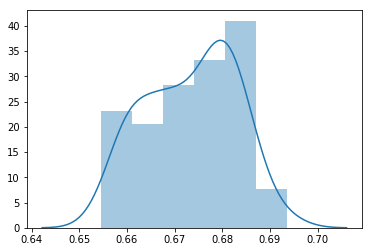

In [10]:
import seaborn as sns
sns.distplot(results_30_glove_200)

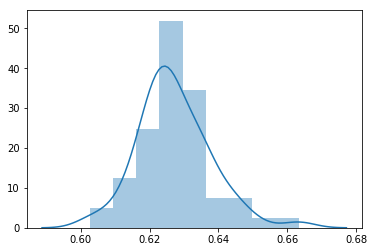

In [11]:
import seaborn as sns
sns.distplot(results_30_sswe)

In [12]:
#results_30_glove_200 = repeated_results(60, 2, dong_train, dong_test, glove_200, 0.1)
results_30_sswe = repeated_results(60, 3, dong_train, dong_test, sswe, 0.1)

batch size 20 jobs 3
start sswe
start sswe
start sswe
end sswe
score 0.6358381502890174
end sswe
score 0.6257225433526011
end sswe
score 0.6517341040462428
done
start sswe
start sswe
start sswe
end sswe
score 0.6286127167630058
end sswe
score 0.6329479768786127
end sswe
score 0.6329479768786127
done
start sswe
start sswe
start sswe
end sswe
score 0.6372832369942196
end sswe
score 0.6098265895953757
end sswe
score 0.630057803468208
done
start sswe
start sswe
start sswe
end sswe
score 0.6445086705202312
end sswe
score 0.6213872832369942
end sswe
score 0.653179190751445
done
start sswe
start sswe
start sswe
end sswe
score 0.6401734104046243
end sswe
score 0.638728323699422
end sswe
score 0.6372832369942196
done
start sswe
start sswe
start sswe
end sswe
score 0.6271676300578035
end sswe
score 0.6329479768786127
end sswe
score 0.6271676300578035
done
start sswe
start sswe
start sswe
end sswe
score 0.6546242774566474
end sswe
score 0.6286127167630058
end sswe
score 0.6329479768786127
done
st

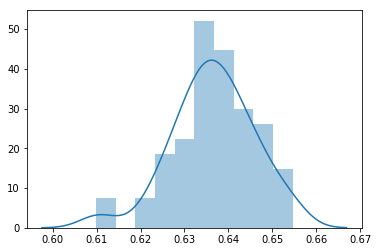

In [14]:
import seaborn as sns
sns.distplot(results_30_sswe)

In [12]:
import json
repeated_results_folder = os.path.join(result_folder, 'TCLstm Repeated Results')
os.makedirs(repeated_results_folder, exist_ok=True)
repeated_results_file = os.path.join(repeated_results_folder, 'Glove 200.json')
with open(repeated_results_file, 'w') as fp:
    json.dump(results_30_glove_200, fp)
repeated_results_file = os.path.join(repeated_results_folder, 'sswe.json')
with open(repeated_results_file, 'w') as fp:
    json.dump(results_30_sswe, fp)

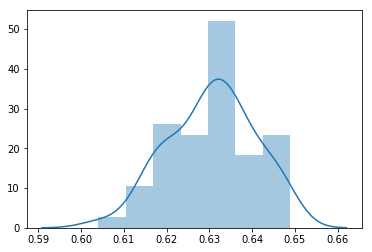

In [8]:
import seaborn as sns
sns.distplot(results_30_sswe)

In [9]:
tclstm_model = TCLSTM(ark_twokenize, sswe, lower=True)
tclstm_model.fit(dong_train.data_dict(), dong_train.sentiment_data(), reproducible=True,
                 validation_size=0.3, patience=10, epochs=300, verbose=0,
                 org_initialisers=True, lstm_dimension=100)
predictions_keras = tclstm_model.predict(dong_test.data_dict())
score_keras = TCLSTM.score(dong_test.sentiment_data(), predictions_keras, accuracy_score)

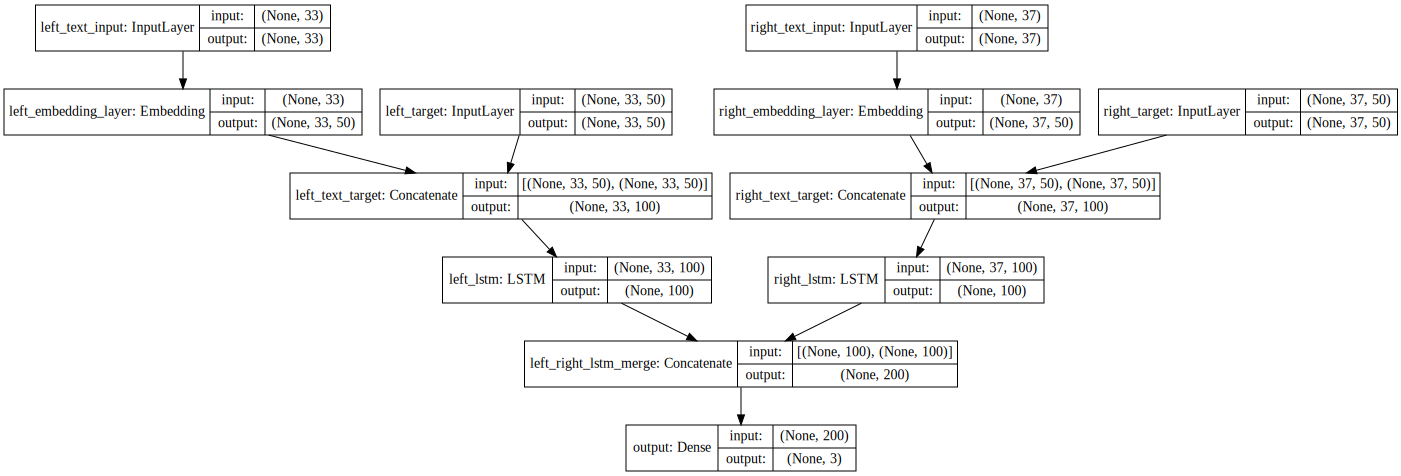

In [10]:
tclstm_model.visulaise()

In [11]:
score_keras

0.66040462427745661

In [9]:
results_df = pd.DataFrame(np.zeros((len(embeddings), len(validation_sizes))))
results_df.index = ['{}'.format(embedding) for  embedding in embeddings]
results_df.columns = ['{}'.format(int(val_size * 100)) for val_size in validation_sizes]
for result in results:
    embedding_name, val_size, score = result
    results_df[val_size][embedding_name] = score
round(results_df * 100, 2)

TypeError: 'numpy.float64' object is not iterable

As we can see from the results above the validation set matters however we can see 20% validation appears to be the worse. I should imagine this is due to the 30 and 15% sets containing data that is more representive of the test data therefore allowing the model to find features/weights that can better sperate the classes within the test data.

However it could just be due to the random seed we used and that the validation split that was found is just not very reprenative of the test data. We think this is the case as it is unusall that a smaller sample size 0.1 is better representative of the test data than a large sample size 0.2. Therefore below we use the Glove 50 dimension vectors and re-run the experiment using a different random validation split each time to see the affect over a larger sample size to see what the affect of validation size is with a larger sample size:

In [ ]:
def validation_prediction(train_data, test_data, embedding, validation_size, reproducible):
    print('start {}'.format(embedding))
    pad_size = half_average_dataset(train_data)
    tclstm_model = TCLSTM(ark_twokenize, embedding, lower=True, pad_size=pad_size)
    tclstm_model.fit(train_data.data_dict(), train_data.sentiment_data(), reproducible=reproducible,
                     validation_size=validation_size, patience=10, epochs=300, verbose=0,
                     org_initialisers=True)
    predictions = tclstm_model.predict(test_data.data_dict())
    embedding_name = '{}'.format(embedding)
    score = TCLSTM.score(test_data.sentiment_data(), predictions, accuracy_score)
    print('end {}'.format(embedding))
    return score
def val_pred_wrapper(train_data, test_data, embedding, validation_size, reproducible):
    score = validation_prediction(embedding, validation_size, reproducible)
    return ('{}'.format(embedding), 
            'Validation Size {}%'.format(int(validation_size * 100)),
            score)

train_data = [dong_train]
test_data = [dong_test]
embeddings = [sswe, glove_50, glove_100, glove_200]
validation_sizes = [0.3, 0.2, 0.1]
reproducible = [True]
val_pred_params = list(itertools.product(train_data, test_data, embeddings, validation_sizes, reproducible))
results = None
time_taken = time.time()
#print(val_pred_wrapper(*val_pred_params[0]))
with Pool(10) as pool:
    results = pool.starmap(val_pred_wrapper, val_pred_params)
time_taken = time.time() - time_taken
time_taken

start sswe
start sswe
start sswe
start glove twitter 50d
start glove twitter 50d
end glove twitter 50d
start glove twitter 50d
end sswe
start glove twitter 100d
end glove twitter 50d
end sswe
start glove twitter 100d
start glove twitter 100d
end sswe
start glove twitter 200d
end glove twitter 50d
start glove twitter 200d
end glove twitter 100d
start glove twitter 200d
end glove twitter 100d
end glove twitter 100d


In [ ]:
results_20 = repeated_results(100, 3, glove_200, 0.2)

In [ ]:
results_10 = repeated_results(100, 3, glove_200, 0.1)

In [9]:
results_30

NameError: name 'results_30' is not defined

In [ ]:
results_repeated_df = pd.DataFrame({'Validation 10%' : results_10,
                                    'Validation 20%' : results_20,
                                    'Validation 30%' : results_30})
results_repeated_df = round(results_repeated_df * 100, 2)
ax = sns.boxplot(data=results_repeated_df)
ax = sns.swarmplot(data=results_repeated_df, color=".25")
ax.set_ylabel('Test Accuracy (%)')
ax.set_title('Comparison of Validation Set Sizes')
ax

In [ ]:
results_repeated_summary = results_repeated_df.describe().T.round(2)
results_repeated_summary

As we can see the different between the two validation sets is slight. The 30% has a higher minimum and maximum value as well as it deviate less suggesting that on average this set better represents the test data. Even though the training set of the LSTM will be 10% lower it is worth having a better validation set for training the LSTM algorthim.